# Mission Objective
The rocket will

1. be launched from the Earth surface,
2. perform a procedure turn to a desired angle,
3. reach desired Earth altitude and orbit around the Earth,
4. perform Hohmann transfer to reach a higher altitude orbit,
5. perform Hohmann transfer to reach the orbit of the Moon, and
6. reach desired Moon altitude and orbit around the Moon.

# Assumptions

1. The Earth, the Moon, and the rocket are in the same plane.
2. The mass of the rocket is constant.
3. There are no drag force or friction acting on the rocket.
4. There are no gravitational force acting on the rocket from mass other than the Earth and the Moon.
5. The rocket is a point mass.
6. The rocket is equipped with gimbaled engine that can change the direction of thrust.
7. The Earth and the Moon are perfect spheres.
8. The Earth is not in motion.
9. The center of the Earth is the origin of the axes.
10. The Moon's orbit is a circular orbit.

# Prerequisites

## Computer Programming
1. List operation
2. Class, objects, and methods
3. `matplotlib.pyplot` graphing

## Physics
1. Newtonian mechanics
2. Orbital mechanics

## Pre-Calculus
1. Trigonometry
2. Vectors

## Calculus
1. Euler's method

# Settings
Import python modules needed for scientific calculations.

In [10]:
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Define frequently used global constants ([Global Constants](#Global-Constants)). To alter the time of the simulation, change the constant `z` .

In [12]:
__author__ = 'LIN, TENG-JUI'
z = int(864000)
G = 6.67e-11
angleCF = math.pi / 180
pi = math.pi
twopi = 2 * math.pi

Define time. The smaller the time step, the more accurate the trajectory; however, the computation time will increase proportionally.

In [ ]:
t = [None]*z
t[0] = 0
dt = 1

In this project, we will use Euler's method to approximate the paths of the rocket and the Moon. The essential idea behind Euler's method is to use linear functions to approximate other continuous functions on an infinitesimally small interval. In this case, we want to know how the parameters such as position, velocity, and acceleration vary with respect to time. Since the motion of the rocket lasts for a long time period, namely, over days, a reasonable approximation of small time step would be $1\mathrm{s}$. Although taking $0.1\mathrm{s}$ as the time step enhances the accuracy, the calculation time will increase tenfold accordingly.

# Class `Mass`

Create a class called `Mass`. Initialize the class by defining basic properties of masses and the initial condition ([`Mass` Constants](#Mass-Constants) and [`Mass` Variables](#Mass-Variables)).

Notably, the gravitational constant $\mu$ in the code is defined by $$\mu = Gm;$$ however, when using gravitational constants in physics calculation, it is defined by the sum of the gravitational constants from two masses $$\mu = G(m_1+m_2) = Gm_1 + Gm_2 = \mu_1 + \mu_2.$$ Thus, if we encounter calculation with $\mu$, we should add the $\mu$ of each mass. The rocket's $\mu$ is negligible here comparing to other celestial bodies, so we neglect the rocket's $\mu$ in this code. 

In [14]:
class Mass:
    def __init__(self, mass, x0 ,y0):
        self.mass = mass
        self.mu = G * self.mass
        self.x = [None]*z
        self.y = [None]*z
        self.r = [None]*z
        self.x[0] = x0
        self.y[0] = y0
        self.r[0] = math.sqrt(x0**2 + y0**2)

# Class `CelestialBody`

Create a class called `CelestialBody` that inherits the properties of `Mass`. Initialize the class by defining basic properties of celestial bodies and the initial conditions ([`CelestialBody` Constants](#CelestialBody-Constants) and [`CelestialBody` Variables](#CelestialBody-Variables)).

Notably, the Moon's sphere of influence $r_{SOI}$ is defined by $$r_{SOI} = R (\frac{m_c}{m_e}) ^ \frac{2}{5}$$ in `Settings()`, and its position is defined by $$x_M(t) = r\cos(\frac{2\pi}{T}t + \omega_0)$$ and $$y_M(t) = r\sin(\frac{2\pi}{T}t + \omega_0)$$ in `Position()`, where $r$ is the Moon's distance from the Earth, $\frac{2\pi}{T}t$ is the change of the angle from the start, and $\omega_0$ is the initial angle.
The angle of the Moon $\omega$ is conditionally calculated by 
$$
\omega = 
  \begin{cases} 
   \arccos{\frac{x_M}{\|\mathbf{r_M}\|}} & \text{if } y_M \geq 0 \\
   2\pi - \arccos{\frac{x_M}{\|\mathbf{r_M}\|}} & \text{if } y_M < 0.
  \end{cases}
$$
$\omega_0$ is calculated according to the initial $x_M$ and $\|\mathbf{r_M}\|$.

In [15]:
class CelestialBody(Mass):
    def Settings(self, radius, period, dE):
        self.radius = radius
        self.period = period * 24 * 60 * 60.0
        self.dE = dE
        self.soi = (self.mass / Earth.mass) ** 0.4 * self.radius
    def Position(self):
        self.x[i+1] = (self.dE) * \
        math.cos(2 * math.pi / self.period * t[i+1] + self.omega[0])
        self.y[i+1] = (self.dE) * \
        math.sin(2 * math.pi / self.period * t[i+1] + self.omega[0])
        self.r[i+1] = math.sqrt(self.x[i+1]**2 + self.y[i+1]**2)
    def MoonAngle_init(self):
        self.omega = [None]*z
        if self.y[0] >= 0:
            self.omega[0] = math.acos(self.x[0] / self.r[0])
        elif self.y[0] < 0:
            self.omega[0] = twopi - math.acos(self.x[0] / self.r[0])
        else:
            print "omega error in CelestialBody.MoonAngle_init()"
    def Angles(self):
        if self.y[i+1] >= 0:
            self.omega[i+1] = math.acos(self.x[i+1] / self.r[i+1])
        elif self.y[i+1] < 0:
            self.omega[i+1] = twopi - math.acos(self.x[i+1] / self.r[i+1])
        else:
            print "omega error in CelestialBody.Angles()"

Create `Earth` object and `Moon` object under `CelestialBody` class and define their initial values.

In [16]:
Earth = CelestialBody(5.97237e+24, 0.0, 0.0)
Earth.Settings(6.3781e+6, 365, 0.0)
Moon = CelestialBody(7.342e+22, 364658999.01580966, 121599365.28529961)
Moon.Settings(1.7371e+6, 30, 3.84399e+8)
Moon.MoonAngle_init()

List of Parameters:

|Code Symbol     |Math Symbol     |Earth            |Moon              |Unit             |
|----------------|:--------------:|-----------------|------------------|:---------------:|
|`mass`          |$m$             |5.97237e+24      |7.342e+22         |$\mathrm{kg}$    |
|`x`             |$x$             |0.0              |364658999.01580966|$\mathrm{m}$     |
|`y`             |$y$             |0.0              |121599365.28529961|$\mathrm{m}$     |
|`radius`        |$r$             |6.3781e+6        |1.7371e+6         |$\mathrm{m}$     |
|`period`        |$T$             |365              |30                |$\mathrm{day}$   |
|`dE`            |$r$             |0.0              |3.84399e+8        |$\mathrm{m}$     |

(Notice that the unit of period is converted into seconds in the code.)

# Class `Rocket`

Create a class called `Rocket` that inherits the properties of `Mass`. Initialize the class by defining basic properties of the rocket and the initial conditions ([`Rocket` Constants](#Rocket-Constants), [`Rocket` Variables](#Rocket-Variables) and [`Rocket` Thrust Tracker Variables](#Rocket-Thrust-Tracker-Variables)). The parameters of the rocket are defined separately in different functions. 

## Position Function
The position function defines and calculates the position of the rocket, where $x$ and $y$ are calculated by $$x(t) = x_0 + v_x t + \frac{1}{2} a_x t^2$$ and $$y(t) = y_0 + v_y t + \frac{1}{2} a_y t^2,$$ so $\|\mathbf{r}\|$ is $$\|\mathbf{r}\| = \sqrt{x^2 + y^2}.$$ Although those position equations assume constant acceleration, by using Euler's method, we approximate the acceleration on a small interval as constant, satisfying such assumption. To find the altitude of the rocket, subtract the radius of Earth from $\|\mathbf{r}\|$: $$Alt_E = \|\mathbf{r}\| - r_E.$$ 

## Velocity Function
The velocity function defines and calculates the velocity of the rocket, where $v_x$ and $v_y$ are calculated by $$v_{x}(t) = v_{x0} + a_{x}t$$ and $$v_{y}(t) = v_{y0} + a_{y}t,$$ so $\|\mathbf{v}\|$ is $$\|\mathbf{v}\| = \sqrt{v_x^2 + v_y^2}.$$ By the same argument, we assume the acceleration is constant on small intervals.

## Force Function
The force function defines and calculates the force of the rocket. The gravitational forces $F_{E}$ and $F_{M}$ are defined by $$F_{E} = - G\frac{m_E m}{\|\mathbf{r}\|^2}$$ and $$F_{R} = - G\frac{m_M m}{\|\mathbf{r}\|^2}.$$
The thrust of the rocket provided by the engine is conditionally defined according to time and special maneuvers. If the time is before the engine turn off time, $F_r$ will remain constant as the initial thrust. If the time is after the engine turn off time, $F_r = 0$. If the rocket performs special maneuvers, the thrust will be specifically redefined in the acceleration functions.

## Angle Function
The angle function defines and calculates the angle parameters of the rocket. The angle of the $\mathbf{r}$, denoted by $\theta$, is conditionally calculated by 
$$
\theta = 
  \begin{cases} 
   \arccos{\frac{x}{\|\mathbf{r}\|}} & \text{if } y \geq 0 \\
   2\pi - \arccos{\frac{x}{\|\mathbf{r}\|}} & \text{if } y < 0.
  \end{cases}
$$
The angle of the $\mathbf{v}$, denoted by $\epsilon$, is conditionally calculated by 
$$
\epsilon = 
  \begin{cases} 
   \arccos{\frac{v_x}{\|\mathbf{v}\|}} & \text{if } v_y \geq 0 \\
   2\pi - \arccos{\frac{v_x}{\|\mathbf{v}\|}} & \text{if } v_y < 0.
  \end{cases}
$$ 
The angle of the $\mathbf{r_{MR}}$, denoted by $\phi$, is conditionally calculated by 
$$
\phi = 
  \begin{cases} 
   \arccos{\frac{r_{MRx}}{\|\mathbf{r_{MR}}\|}} & \text{if } r_{MRy} \geq 0 \\
   2\pi - \arccos{\frac{r_{MRx}}{\|\mathbf{r_{MR}}\|}} & \text{if } r_{MRy} < 0.
  \end{cases}
$$
The angle of $F_r$, denoted by $\tau$, is defined in acceleration functions to adapt to specific situations.

## Acceleration Functions
The acceleration of the rocket is defined by multiple functions, where each function defines the acceleration of the rocket under different situations. 

### Normal Acceleration
The normal acceleration function defines and calculates the acceleration of the rocket, where $a_x$ and $a_y$ are defined by $$a_x(t) = \frac{F_E \cos\theta + F_M \cos\phi + F_r \cos\tau}{m}$$ and $$a_y(t) = \frac{F_E \sin\theta + F_M \sin\phi + F_r \sin\tau}{m},$$ so $\|\mathbf{a}\|$ is defined by $$\|\mathbf{a}\| = \sqrt{a_x^2 + a_y^2}.$$ In this case, $\tau$ is equal to the direction of the rocket: $$\tau = \epsilon.$$ After the engine is turned off, causing $F_r = 0$, the rocket will only be affected by $F_E$ and $F_M$.

### Procedure Turn

The procedure turn function defines and calculates the acceleration of the rocket when it performs procedure turn. The components $a_x$ and $a_y$ are defined by $$a_x(t) = \frac{F_E \cos\theta + F_M \cos\phi + F_r \cos\tau}{m}$$ and $$a_y(t) = \frac{F_E \sin\theta + F_M \sin\phi + F_r \sin\tau}{m},$$ so $\|\mathbf{a}\|$ is defined by $$\|\mathbf{a}\| = \sqrt{a_x^2 + a_y^2}.$$
In this case, $\tau$ is equal to the angle of the desired acceleration vector $\mathbf{a_d}$, denoted by $\alpha$: $$\tau = \alpha.$$
To find $\alpha$, we should first find $\mathbf{a_d}$. Suppose the velocity vector is $\mathbf{v}$, and the desire velocity vector is  $\mathbf{v_d}$, where $\|\mathbf{v}\| = \|\mathbf{v_d}\|$, and the angle of $\mathbf{v_d}$ is $\rho$, the procedure turn angle. The desired velocity is $$\mathbf{v_d} = \langle v_{dx}, v_{dy}\rangle = \langle \|\mathbf{v}\| \cos\rho, \|\mathbf{v}\| \sin\rho\rangle.$$
The desired acceleration vector $\mathbf{a_d}$ should be: $$\mathbf{a_d} = \mathbf{v_d} - \mathbf{v} = \langle v_{dx} - v_x, v_{dy} - v_y\rangle = \langle \|\mathbf{v}\| \cos\rho - v_x, \|\mathbf{v}\| \sin\rho - v_y\rangle.$$ (We are not concerned about the magnitude of $\mathbf{a_d}$ here because the rocket is still in its accelerating phase. We are only worried about the angle of $\mathbf{a_d}$).
To find $\alpha$, use the vector angle formula $$\cos \alpha = \frac{a_x}{\|\mathbf{a_d}\|}.$$ If we write it in terms of the known values, we have $$\alpha = \arccos \frac{\|\mathbf{v}\| \cos\rho - v_x}{\sqrt{(\|\mathbf{v}\| \cos\rho - v_x)^2 + (\|\mathbf{v}\| \sin\rho - v_y)^2}}.$$
Since we did not calculate the magnitude of the thrust for the procedure turn to be completed in one time step, it may take a few time step (but still an extremely small time period) to complete procedure turn. We can find the amount of time steps for it to complete a procedure turn by printing `self.Acceleration_ProcedureTurn_called`, where `self` is the name of the Rocket object, after running the program.


In [74]:
Stamina.Acceleration_ProcedureTurn_called

13

In this case, we can conclude that it only takes 13 time steps, namely, 13 seconds to complete the procedure turn. The following graphs illustrate the vectors $\mathbf{v}$, $\mathbf{a_d}$, and $\mathbf{v_d}$, as well as the angle between them:

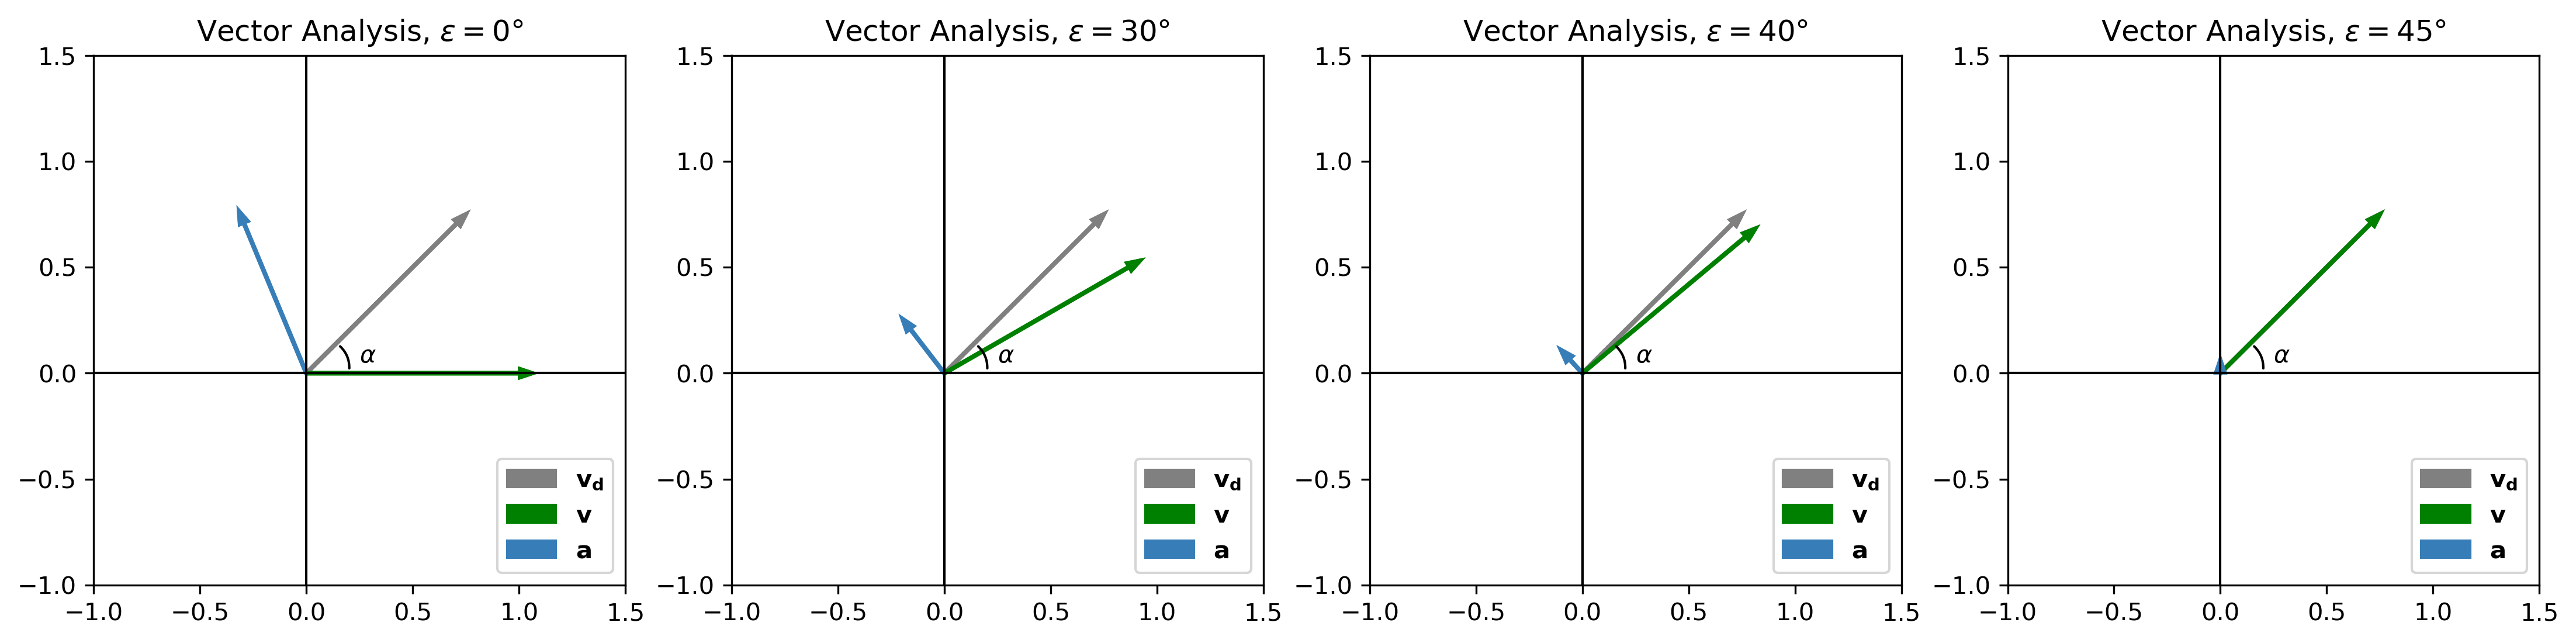

In [78]:
def graph_Vectors_Settings():
    plt.xlim(xmin=-1)
    plt.xlim(xmax=1.5)
    plt.ylim(ymin=-1)
    plt.ylim(ymax=1.5)
    plt.hlines(0, -2, 3 , "black", linewidth=1.0)
    plt.vlines(0, -2, 3 , "black", linewidth=1.0)
    plt.legend(loc='lower right')
    plt.annotate('',
            xy=(0.2, 0),
            xytext=(0.2 * math.cos(pi/4), 0.2 * math.cos(pi/4)),
            arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3,rad=-0.3"))
    plt.text(0.25,0.05, r'$\alpha$', size=10)

def graph_Vectors():
    fig=plt.figure(figsize=(18,4), dpi = 300)
    ax=fig.add_subplot(1,4,1)
    plt.title('Vector Analysis, $\epsilon = 0\degree$')
    ax.add_patch(plt.arrow(0,0,math.sqrt(2)/2,math.sqrt(2)/2,
                           width=0.01,
                           head_width=0.05,
                           label='$\mathbf{v_d}$',
                           color='gray'))
    ax.add_patch(plt.arrow(0,0,1,0,
                           width=0.01,
                           head_width=0.05,
                           label='$\mathbf{v}$',
                           color='green'))
    ax.add_patch(plt.arrow(0,0,math.sqrt(2)/2-1,math.sqrt(2)/2,
                           width=0.01,
                           head_width=0.05,
                           label='$\mathbf{a}$',
                           color='#377EB8'))
    graph_Vectors_Settings()
    #
    ax=fig.add_subplot(1,4,2)
    plt.title('Vector Analysis, $\epsilon = 30\degree$')
    ax.add_patch(plt.arrow(0,0,math.sqrt(2)/2,math.sqrt(2)/2,
                           width=0.01,
                           head_width=0.05,
                           label='$\mathbf{v_d}$',
                           color='gray'))
    ax.add_patch(plt.arrow(0,0,math.sqrt(3)/2,0.5,
                           width=0.01,
                           head_width=0.05,
                           label='$\mathbf{v}$',
                           color='green'))
    ax.add_patch(plt.arrow(0,0,(math.sqrt(2)-math.sqrt(3))/2,math.sqrt(2)/2-0.5,
                           width=0.01,
                           head_width=0.05,
                           label='$\mathbf{a}$',
                           color='#377EB8'))
    graph_Vectors_Settings()
    #
    ax=fig.add_subplot(1,4,3)
    plt.title('Vector Analysis, $\epsilon = 40\degree$')
    ax.add_patch(plt.arrow(0,0,math.sqrt(2)/2,math.sqrt(2)/2,
                           width=0.01,
                           head_width=0.05,
                           label='$\mathbf{v_d}$',
                           color='gray'))
    ax.add_patch(plt.arrow(0,0,math.cos(40*angleCF),math.sin(40*angleCF),
                           width=0.01,
                           head_width=0.05,
                           label='$\mathbf{v}$',
                           color='green'))
    ax.add_patch(plt.arrow(0,0,math.sqrt(2)/2 - math.cos(40*angleCF),
                           math.sqrt(2)/2 - math.sin(40*angleCF),
                           width=0.01,
                           head_width=0.05,
                           label='$\mathbf{a}$',
                           color='#377EB8'))
    graph_Vectors_Settings()
    #
    ax=fig.add_subplot(1,4,4)
    plt.title('Vector Analysis, $\epsilon = 45\degree$')
    ax.add_patch(plt.arrow(0,0,math.sqrt(2)/2,math.sqrt(2)/2, 
                           width=0.01,
                           head_width=0.05,
                           label='$\mathbf{v_d}$',
                           color='gray'))
    ax.add_patch(plt.arrow(0,0,math.sqrt(2)/2,math.sqrt(2)/2,
                           width=0.01,
                           head_width=0.05,
                           label='$\mathbf{v}$',
                           color='green'))
    ax.add_patch(plt.arrow(0,0,0,0, 
                           width=0.01, 
                           head_width=0.05,
                           label='$\mathbf{a}$',
                           color='#377EB8'))
    graph_Vectors_Settings()
    plt.show()
graph_Vectors()

In [81]:
%%HTML
<button onclick="$('.input, .prompt, .output_stderr, .output_error, .output_result').toggle();">Toggle Code</button>

### Thrust 1
The thrust 1 function defines and calculates the acceleration of the rocket when it performs thrust 1, the thrust that pushes the rocket to the lower altitude orbit around the Earth. The thrust vector controlled engine will calculate the direction and the magnitude of the acceleration vector. The parameters

+ `tau` is defined by $$\tau = \alpha,$$ where $\alpha$ is the angle of $\mathbf{a_d}$;

+ `a_x` is defined by $$a_x(t) = \frac{F_e \cos\theta + F_m \cos\phi + F_r \cos\tau}{m};$$

+ `a_y` is defined by $$a_y(t) = \frac{F_e \sin\theta + F_m \sin\phi + F_r \sin\tau}{m};$$and

+ `a` is defined by $$a = \sqrt{a_x^2 + a_y^2}.$$

To find $\alpha$, find  $\mathbf{v_d}$ in order to calculate $\mathbf{a_d}$. The speed for orbiting around a circle is $$\|\mathbf{v_d}\| = \frac{\sqrt{\mu r}}{r},$$ where $\mu$ is the gravitational parameter, and $r$ is the radius of the circle. The components of $\mathbf{v_d}$ is $$\mathbf{v_d} = \langle \|\mathbf{v}\| \cos\gamma, \|\mathbf{v}\| \sin\gamma \rangle,$$ where $\gamma$ is the angle of $\mathbf{v_d}$: $$\gamma = \frac{\pi}{2} + \theta.$$

Here we are concerned about the magnitude of $\mathbf{a_d}$ since we want the maneuver to be completed in one time step. The desired velocity is $$\mathbf{v_d} = \mathbf{v} + \mathbf{a} \ dt,$$ so the desired acceleration is $$\mathbf{a_d} = \frac{1}{dt} (\mathbf{v_d} - \mathbf{v}) = \frac{1}{dt} \langle v_{dx} - v_x, v_{dy} - v_y\rangle = \langle \|\mathbf{v_d}\| \cos\gamma - v_x, \|\mathbf{v_d}\| \sin\gamma - v_y\rangle.$$ 

Thus, the angle of $\mathbf{a_d}$ can be calculated by $$\alpha = \arccos\frac{a_x}{\|\mathbf{a_d}\|}.$$

The thrust of the rocket should be $$F_r = m \|\mathbf{a_d}\|,$$ where $m$ is the mass of the rocket.

## Crash Function
The crash function specifies conditions when the rocket is crashed. If the altitude of the rocket to any celestial body is smaller than the celestial body's radius, then the rocket is crashed.

In [18]:
class Rocket(Mass):
    def Settings(self, crash, procedureTurnTime, procedureTurnAngle, \
                 Turnoff, TargetAltitude, TargetAltitude2, \
                 TargetMoonAltitude, v_x0, v_y0, theta, epsilon, Fr):
        self.crash = crash
        self.procedureTurnTime = procedureTurnTime
        self.procedureTurnAngle = procedureTurnAngle * angleCF
        self.Turnoff = Turnoff
        self.TargetAltitude = TargetAltitude
        self.TargetAltitude2 = TargetAltitude2
        self.TargetMoonAltitude = TargetMoonAltitude
        self.Alt_Earth = [None]*z
        self.Mx = [None]*z
        self.My = [None]*z
        self.Mr = [None]*z
        self.Alt_Moon = [None]*z
        self.v_x = [None]*z
        self.v_y = [None]*z
        self.v = [None]*z
        self.theta = [None]*z
        self.epsilon = [None]*z
        self.tau = [None]*z
        self.phi = [None]*z
        self.Fg_Earth = [None]*z
        self.Fg_Moon = [None]*z
        self.Fr = [None]*z
        self.a_x = [None]*z
        self.a_y = [None]*z
        self.a = [None]*z
        self.Alt_Earth[0] = 0
        self.Mx[0] = self.x[0] - Moon.x[0]
        self.My[0] = self.y[0] - Moon.y[0]
        self.Mr[0] = math.sqrt(self.Mx[0]**2 + self.My[0]**2)
        self.Alt_Moon[0] = self.Mr[0] - Moon.radius
        self.v_x[0] = v_x0
        self.v_y[0] = v_y0
        self.v[0] = math.sqrt(self.v_x[0]**2 + self.v_y[0]**2)
        self.theta[0] = theta
        self.epsilon[0] = epsilon
        self.tau[0] = self.epsilon[0]
        if self.y[0] >= Moon.y[0]:
            self.phi[0] = math.acos(self.Mx[0] / self.Mr[0])
        elif self.y[0] < Moon.y[0]:
            self.phi[0] = twopi - math.acos(self.Mx[0] / self.Mr[0])
        else:
            print "phi error in Rocket.Settings()", t[0]
        self.Fg_Earth[0] = -G * Earth.mass * self.mass / self.r[0]**2
        self.Fg_Moon[0] = -G * Moon.mass * self.mass / self.Mr[0]**2
        self.Fr[0] = Fr
        self.a_x[0] = (self.Fg_Earth[0] * math.cos(self.theta[0]) + \
                self.Fr[0] * math.cos(self.epsilon[0])) / self.mass
        self.a_y[0] = (self.Fg_Earth[0] * math.sin(self.theta[0]) + \
                self.Fr[0] * math.sin(self.epsilon[0])) / self.mass
        self.a[0] = math.sqrt(self.a_x[0]**2 + self.a_y[0]**2)
        self.Acceleration_ProcedureTurn_called = 0
        self.Acceleration_Thrust1_1_called = 0
        self.Acceleration_Thrust2_1_called = 0
        self.Acceleration_Thrust3_1_called = 0
        self.Acceleration_Thrust4_1_called = 0
        self.Acceleration_Thrust5_1_called = 0
        self.Acceleration_Thrust6_1_called = 0
    def Position(self):
        self.x[i+1] = self.x[i] + self.v_x[i] * dt + 0.5 * self.a_x[i] * dt**2
        self.y[i+1] = self.y[i] + self.v_y[i] * dt + 0.5 * self.a_y[i] * dt**2
        self.r[i+1] = math.sqrt(self.x[i+1]**2 + self.y[i+1]**2)
        self.Alt_Earth[i+1] = self.r[i+1] - Earth.radius
        self.Mx[i+1] = self.x[i+1] - Moon.x[i+1]
        self.My[i+1] = self.y[i+1] - Moon.y[i+1]
        self.Mr[i+1] = math.sqrt(self.Mx[i+1]**2 + self.My[i+1]**2)
        self.Alt_Moon[i+1] = self.Mr[i+1] - Moon.radius
    def Velocity(self):
        self.v_x[i+1] = self.v_x[i] + self.a_x[i] * dt
        self.v_y[i+1] = self.v_y[i] + self.a_y[i] * dt
        self.v[i+1] = math.sqrt(self.v_x[i+1]**2 + self.v_y[i+1]**2)
    def Force(self):
        self.Fg_Earth[i+1] = -G * Earth.mass * self.mass / self.r[i+1]**2
        self.Fg_Moon[i+1] = -G * Moon.mass * self.mass / self.Mr[i+1]**2
        if t[i+1] < Stamina.Turnoff:
            self.Fr[i+1] = self.Fr[0]
        else:
            self.Fr[i+1] = 0
    def Angles(self):   
        if self.v_y[i+1] >= 0:
            self.epsilon[i+1] = math.acos(self.v_x[i+1] / self.v[i+1])
        elif self.v_y[i+1] < 0:
            self.epsilon[i+1] = twopi - math.acos(self.v_x[i+1] / self.v[i+1])
        else:
            print "epsilon error in Rocket.Angles()", t[i+1]
        if self.y[i+1] >= 0:
            self.theta[i+1] = math.acos(self.x[i+1] / self.r[i+1])
        elif self.y[i+1] < 0:
            self.theta[i+1] = twopi - math.acos(self.x[i+1] / self.r[i+1])
        else:
            print "theta error in Rocket.Angles()", t[i+1]
        if self.y[i+1] >= Moon.y[i+1]:
            self.phi[i+1] = math.acos(self.Mx[i+1] / self.Mr[i+1])
        elif self.y[i+1] < Moon.y[i+1]:
            self.phi[i+1] = twopi - math.acos(self.Mx[i+1] / self.Mr[i+1])
        else:
            print "phi error in Rocket.Angles()", t[i+1]
    def Acceleration_Normal(self):
        self.tau[i+1] = self.epsilon[i+1]
        self.a_x[i+1] = (self.Fg_Earth[i+1] * math.cos(self.theta[i+1]) + \
                self.Fg_Moon[i+1] * math.cos(self.phi[i+1]) + \
                self.Fr[i+1] * math.cos(self.tau[i+1])) / self.mass
        self.a_y[i+1] = (self.Fg_Earth[i+1] * math.sin(self.theta[i+1]) + \
                self.Fg_Moon[i+1] * math.sin(self.phi[i+1]) + \
                self.Fr[i+1] * math.sin(self.tau[i+1])) / self.mass
        self.a[i+1] = math.sqrt(self.a_x[i+1]**2 + self.a_y[i+1]**2)
    def Acceleration_ProcedureTurn(self):
        self.Acceleration_ProcedureTurn_called += 1
        a_x = self.v[i+1] * math.cos(self.procedureTurnAngle) - self.v_x[i+1]
        a_y = self.v[i+1] * math.sin(self.procedureTurnAngle) - self.v_y[i+1]
        a = math.sqrt(a_x**2 + a_y**2)
        if a_y >= 0: 
            self.tau[i+1] = math.acos(a_x / a)
        elif a_y < 0:
            self.tau[i+1] = twopi - math.acos(a_x / a)
        else:
            print "tau error in Rocket.Acceleration_ProcedureTurn()", t[i+1]
        self.a_x[i+1] = (self.Fg_Earth[i+1] * math.cos(self.theta[i+1]) + \
                self.Fg_Moon[i+1] * math.cos(self.phi[i+1]) + \
                self.Fr[i+1] * math.cos(self.tau[i+1])) / self.mass
        self.a_y[i+1] = (self.Fg_Earth[i+1] * math.sin(self.theta[i+1]) + \
                self.Fg_Moon[i+1] * math.sin(self.phi[i+1]) + \
                self.Fr[i+1] * math.sin(self.tau[i+1])) / self.mass
        self.a[i+1] = math.sqrt(self.a_x[i+1]**2 + self.a_y[i+1]**2)
    def Acceleration_Thrust1_1(self):
        self.Acceleration_Thrust1_1_called += 1
        gamma = pi / 2 + self.theta[i+1]
        v_d = math.sqrt(Earth.mu * self.r[i+1]) / self.r[i+1]
        a_x = (v_d * math.cos(gamma) - self.v_x[i+1]) / dt
        a_y = (v_d * math.sin(gamma) - self.v_y[i+1]) / dt
        a = math.sqrt(a_x**2 + a_y**2)
        if a_y >= 0:
            self.tau[i+1] = math.acos(a_x / a)
        elif a_y < 0:
            self.tau[i+1] = twopi - math.acos(a_x / a)
        else:
            print "tau error in Rocket.Acceleration_Thrust1_1()", t[i+1]
        self.Fr[i+1] = self.mass * a
        self.a_x[i+1] = (self.Fg_Earth[i+1] * math.cos(self.theta[i+1]) + \
                self.Fg_Moon[i+1] * math.cos(self.phi[i+1]) + \
                self.Fr[i+1] * math.cos(self.tau[i+1])) / self.mass
        self.a_y[i+1] = (self.Fg_Earth[i+1] * math.sin(self.theta[i+1]) + \
                self.Fg_Moon[i+1] * math.sin(self.phi[i+1]) + \
                self.Fr[i+1] * math.sin(self.tau[i+1])) / self.mass
        self.a[i+1] = math.sqrt(self.a_x[i+1]**2 + self.a_y[i+1]**2)
        print 'Thrust 1', t[i+1]
    def Acceleration_Thrust2_1(self):
        self.Acceleration_Thrust2_1_called += 1
        gamma = pi / 2 + self.theta[i+1]
        v_d = math.sqrt(2 * Earth.mu * \
              (self.TargetAltitude2 + Earth.radius) * (self.r[i+1]) / \
              ((self.TargetAltitude2 + Earth.radius) + (self.r[i+1]))) / \
            self.r[i+1]
        a_x = (v_d * math.cos(gamma) - self.v_x[i+1]) / dt
        a_y = (v_d * math.sin(gamma) - self.v_y[i+1]) / dt
        a = math.sqrt(a_x**2 + a_y**2)
        if a_y >= 0:
            self.tau[i+1] = math.acos(a_x / a)
        elif a_y < 0:
            self.tau[i+1] = twopi - math.acos(a_x / a)
        else:
            print "tau error in Rocket.Acceleration_Thrust2_1()", t[i+1]
        self.Fr[i+1] = self.mass * a
        self.a_x[i+1] = (self.Fg_Earth[i+1] * math.cos(self.theta[i+1]) + \
                self.Fg_Moon[i+1] * math.cos(self.phi[i+1]) + \
                self.Fr[i+1] * math.cos(self.tau[i+1])) / self.mass
        self.a_y[i+1] = (self.Fg_Earth[i+1] * math.sin(self.theta[i+1]) + \
                self.Fg_Moon[i+1] * math.sin(self.phi[i+1]) + \
                self.Fr[i+1] * math.sin(self.tau[i+1])) / self.mass
        self.a[i+1] = math.sqrt(self.a_x[i+1]**2 + self.a_y[i+1]**2)
        print 'Thrust 2', t[i+1]
    def Acceleration_Thrust3_1(self):
        self.Acceleration_Thrust3_1_called += 1
        gamma = pi / 2 + self.theta[i+1]
        v_d = math.sqrt(Earth.mu * self.r[i+1]) / self.r[i+1]
        a_x = (v_d * math.cos(gamma) - self.v_x[i+1]) / dt
        a_y = (v_d * math.sin(gamma) - self.v_y[i+1]) / dt
        a = math.sqrt(a_x**2 + a_y**2)
        if a_y >= 0:
            self.tau[i+1] = math.acos(a_x / a)
        elif a_y < 0:
            self.tau[i+1] = twopi - math.acos(a_x / a)
        else:
            print "tau error in Rocket.Acceleration_Thrust3_1()", t[i+1]
        self.Fr[i+1] = self.mass * a
        self.a_x[i+1] = (self.Fg_Earth[i+1] * math.cos(self.theta[i+1]) + \
                self.Fg_Moon[i+1] * math.cos(self.phi[i+1]) + \
                self.Fr[i+1] * math.cos(self.tau[i+1])) / self.mass
        self.a_y[i+1] = (self.Fg_Earth[i+1] * math.sin(self.theta[i+1]) + \
                self.Fg_Moon[i+1] * math.sin(self.phi[i+1]) + \
                self.Fr[i+1] * math.sin(self.tau[i+1])) / self.mass
        self.a[i+1] = math.sqrt(self.a_x[i+1]**2 + self.a_y[i+1]**2)
        print 'Thrust 3', t[i+1]
    def Acceleration_Thrust4_1(self):
        self.Acceleration_Thrust4_1_called += 1
        gamma = pi / 2 + self.theta[i+1]
        v_d = math.sqrt(2 * Earth.mu * Moon.dE * self.r[i+1] / \
              (Moon.dE + self.r[i+1])) / self.r[i+1]
        a_x = (v_d * math.cos(gamma) - self.v_x[i+1]) / dt
        a_y = (v_d * math.sin(gamma) - self.v_y[i+1]) / dt
        a = math.sqrt(a_x**2 + a_y**2)
        if a_y >= 0:
            self.tau[i+1] = math.acos(a_x / a)
        elif a_y < 0:
            self.tau[i+1] = twopi - math.acos(a_x / a)
        else:
            print "tau error in Rocket.Acceleration_Thrust4_1()", t[i+1]
        self.Fr[i+1] = self.mass * a
        self.a_x[i+1] = (self.Fg_Earth[i+1] * math.cos(self.theta[i+1]) + \
                self.Fg_Moon[i+1] * math.cos(self.phi[i+1]) + \
                self.Fr[i+1] * math.cos(self.tau[i+1])) / self.mass
        self.a_y[i+1] = (self.Fg_Earth[i+1] * math.sin(self.theta[i+1]) + \
                self.Fg_Moon[i+1] * math.sin(self.phi[i+1]) + \
                self.Fr[i+1] * math.sin(self.tau[i+1])) / self.mass
        self.a[i+1] = math.sqrt(self.a_x[i+1]**2 + self.a_y[i+1]**2)
        print 'Thrust 4', t[i+1]
    def Acceleration_Thrust5_1(self):
        self.Acceleration_Thrust5_1_called += 1
        gamma = pi / 2 + self.theta[i+1]
        v_d = math.sqrt(Earth.mu * self.r[i+1]) / self.r[i+1]
        a_x = (v_d * math.cos(gamma) - self.v_x[i+1]) / dt
        a_y = (v_d * math.sin(gamma) - self.v_y[i+1]) / dt
        a = math.sqrt(a_x**2 + a_y**2)
        if a_y >= 0:
            self.tau[i+1] = math.acos(a_x / a)
        elif a_y < 0:
            self.tau[i+1] = twopi - math.acos(a_x / a)
        else:
            print "tau error in Rocket.Acceleration_Thrust5_1()", t[i+1]
        self.Fr[i+1] = self.mass * a
        self.a_x[i+1] = (self.Fg_Earth[i+1] * math.cos(self.theta[i+1]) + \
                self.Fg_Moon[i+1] * math.cos(self.phi[i+1]) + \
                self.Fr[i+1] * math.cos(self.tau[i+1])) / self.mass
        self.a_y[i+1] = (self.Fg_Earth[i+1] * math.sin(self.theta[i+1]) + \
                self.Fg_Moon[i+1] * math.sin(self.phi[i+1]) + \
                self.Fr[i+1] * math.sin(self.tau[i+1])) / self.mass
        self.a[i+1] = math.sqrt(self.a_x[i+1]**2 + self.a_y[i+1]**2)
        print 'Thrust 5', t[i+1]
    def Acceleration_Thrust6_1(self):
        self.Acceleration_Thrust6_1_called += 1
        gamma = self.phi[i+1] - pi / 2
        v_m = math.sqrt(Earth.mass * G / Moon.dE)
        v_d = math.sqrt(Moon.mu * self.Mr[i+1]) / self.Mr[i+1]
        a_x = (v_d * math.cos(gamma) + v_m * \
               math.cos(Moon.omega[i+1] + pi / 2) - self.v_x[i+1]) / dt
        a_y = (v_d * math.sin(gamma) + v_m * \
               math.sin(Moon.omega[i+1] + pi / 2) - self.v_y[i+1]) / dt
        a = math.sqrt(a_x**2 + a_y**2)
        if a_y >= 0:
            self.tau[i+1] = math.acos(a_x / a)
        elif a_y < 0:
            self.tau[i+1] = twopi - math.acos(a_x / a)
        else:
            print "tau error in Rocket.Acceleration_Thrust6_1()", t[i+1]
        self.Fr[i+1] = self.mass * a + self.Fg_Moon[i+1] + self.Fg_Earth[i+1]
        self.a_x[i+1] = (self.Fg_Earth[i+1] * math.cos(self.theta[i+1]) + \
                self.Fg_Moon[i+1] * math.cos(self.phi[i+1]) + \
                self.Fr[i+1] * math.cos(self.tau[i+1])) / self.mass
        self.a_y[i+1] = (self.Fg_Earth[i+1] * math.sin(self.theta[i+1]) + \
                self.Fg_Moon[i+1] * math.sin(self.phi[i+1]) + \
                self.Fr[i+1] * math.sin(self.tau[i+1])) / self.mass
        self.a[i+1] = math.sqrt(self.a_x[i+1]**2 + self.a_y[i+1]**2)
    def Crash(self):
        if self.Alt_Earth[i+1] <= 0.0 or self.Alt_Moon[i+1] <= 0.0:
            print "crash at", t[i+1], "s"
            self.crash = True
        else:
            pass

Create `Stamina` object under `Rocket` class and define their initial values.

In [19]:
Stamina = Rocket(1.0e+5, Earth.radius, 0)
Stamina.Settings(False, 20, 45, 200, 1e6, 10e6, 1e6, \
                 0.0, 0.0, 0.0, 0.001*angleCF, 5.5e6)

Create empty lists that holds the normalized position of the Moon and the rocket. Append the initial normalized data to the empty list.

In [20]:
temp_Moon_x_list = []
temp_Moon_y_list = []
temp_Stamina_x_list = []
temp_Stamina_y_list = []
temp_Moon_x_list.append(Moon.x[0] / Earth.radius)
temp_Moon_y_list.append(Moon.y[0] / Earth.radius)
temp_Stamina_x_list.append(Stamina.x[0] / Earth.radius)
temp_Stamina_y_list.append(Stamina.y[0] / Earth.radius)

In [21]:
keyframe = np.arange(0, z, 500)

for i in range(z-1):
    t[i+1] = t[i] + dt
    Moon.Position()
    Moon.Angles()
    Stamina.Position()
    while i in keyframe:
        temp_Moon_x = Moon.x[i+1] / Earth.radius
        temp_Moon_y = Moon.y[i+1] / Earth.radius
        temp_Stamina_x = Stamina.x[i+1] / Earth.radius
        temp_Stamina_y = Stamina.y[i+1] / Earth.radius
        temp_Moon_x_list.append(temp_Moon_x)
        temp_Moon_y_list.append(temp_Moon_y)
        temp_Stamina_x_list.append(temp_Stamina_x)
        temp_Stamina_y_list.append(temp_Stamina_y)
        break
    Stamina.Velocity()
    Stamina.Force()
    Stamina.Angles()
    if t[i+1] > Stamina.procedureTurnTime and \
    Stamina.procedureTurnAngle - Stamina.epsilon[i] > 0 and \
    Stamina.Acceleration_Thrust1_1_called == 0:
        Stamina.Acceleration_ProcedureTurn()
    elif t[i+1] > Stamina.procedureTurnTime and \
    Stamina.TargetAltitude + 5e5 > Stamina.Alt_Earth[i+1] > \
    Stamina.TargetAltitude and \
    Stamina.Acceleration_Thrust1_1_called == 0 and \
    Stamina.Acceleration_Thrust2_1_called == 0:
        Stamina.Acceleration_Thrust1_1()
    elif t[i+1] > Stamina.procedureTurnTime and \
    Stamina.TargetAltitude + 5e5 > Stamina.Alt_Earth[i+1] > \
    Stamina.TargetAltitude - 5e5 and \
    Stamina.x[i+1] >= 0 and Stamina.y[i+1] < 0 and \
    Stamina.Acceleration_Thrust2_1_called == 0 and \
    Stamina.Acceleration_Thrust3_1_called == 0:
        Stamina.Acceleration_Thrust2_1()
    elif t[i+1] > Stamina.procedureTurnTime and \
    Stamina.TargetAltitude2 + 5e5 > Stamina.Alt_Earth[i+1] > \
    Stamina.TargetAltitude2 and \
    Stamina.Acceleration_Thrust3_1_called == 0 and \
    Stamina.Acceleration_Thrust4_1_called == 0:
        Stamina.Acceleration_Thrust3_1()
    elif t[i+1] > Stamina.procedureTurnTime and \
    Stamina.TargetAltitude2 + 5e5 > Stamina.Alt_Earth[i+1] > \
    Stamina.TargetAltitude2 - 5e5 and \
    Stamina.x[i+1] >= 0 and Stamina.y[i+1] < 0 and \
    Stamina.Acceleration_Thrust4_1_called == 0 and \
    Stamina.Acceleration_Thrust5_1_called == 0:
        Stamina.Acceleration_Thrust4_1()
    elif t[i+1] > Stamina.procedureTurnTime and \
    225 * angleCF > Stamina.epsilon[i] > 180 * angleCF and \
    Moon.dE + 5e5 > Stamina.Alt_Earth[i+1] > Moon.dE and \
    Stamina.Acceleration_Thrust5_1_called == 0 and \
    Stamina.Acceleration_Thrust6_1_called == 0:
        Stamina.Acceleration_Thrust5_1()
    elif t[i+1] > Stamina.procedureTurnTime and \
    Stamina.TargetMoonAltitude > Stamina.Alt_Moon[i+1]:
        Stamina.Acceleration_Thrust6_1()
    else:
        Stamina.Acceleration_Normal()
    Stamina.Crash()
    if Stamina.crash:
        break
    else:
        pass

Thrust 1 334
Thrust 2 4833
Thrust 3 10911
Thrust 4 21655


# Blender
To visualize the relative positions of the Earth, the Moon, and the rocket, we can use Blender, an open source three dimention modeling software based on python, to model the path of the Moon and the rocket.

## Data Output
Write the data collected from the program to a text file, so the position data of the rocket and the Moon can be visualized in Blender.

In [26]:
open("blender_data_list.txt", \
     "w").write('temp_Moon_x_list = ' + str(temp_Moon_x_list) + '\n' \
     + 'temp_Moon_y_list = ' + str(temp_Moon_y_list) + '\n' \
     + 'temp_Stamina_x_list = ' + str(temp_Stamina_x_list) + '\n' \
     + 'temp_Stamina_y_list = ' +  str(temp_Stamina_y_list) + '\n')

## Keyframes
Copy all the content in the text file to Blender python console. Set the keyframe of the Moon, the rocket, and the cameras of each object using the position data calculated by the program.

In [ ]:
import bpy
bpy.data.scenes["Scene"].frame_current = 0
for n in range(int(z/1000)):
    bpy.ops.anim.keyframe_insert_menu(type='Location')
    bpy.data.objects["Moon"].location[0] = temp_Moon_x_list[n]
    bpy.data.objects["Moon"].location[1] = temp_Moon_y_list[n]
    bpy.data.objects["CameraMoon"].location[0] = temp_Moon_x_list[n]
    bpy.data.objects["CameraMoon"].location[1] = temp_Moon_y_list[n]
    bpy.data.objects["CameraStamina"].location[0] = temp_Stamina_x_list[n]
    bpy.data.objects["CameraStamina"].location[1] = temp_Stamina_y_list[n]
    bpy.data.objects["Stamina"].location[0] = temp_Stamina_x_list[n]
    bpy.data.objects["Stamina"].location[1] = temp_Stamina_y_list[n]
    bpy.data.scenes["Scene"].frame_current += 1

# Graphs

## Common Settings
The common settings of the graphs include the domain $[0,t]$ and the mark of the x-axis.

In [22]:
def graph_Common_Settings():
    plt.xlim(xmin=0)
    plt.xlim(xmax=t[i+1])
    plt.hlines(0, t[0], t[i+1], "gray", linewidth=0.5)

## Position Graphs
The position graphs visualize $x$, $y$, $Alt_E$, and $Alt_M$ with respect to $t$.

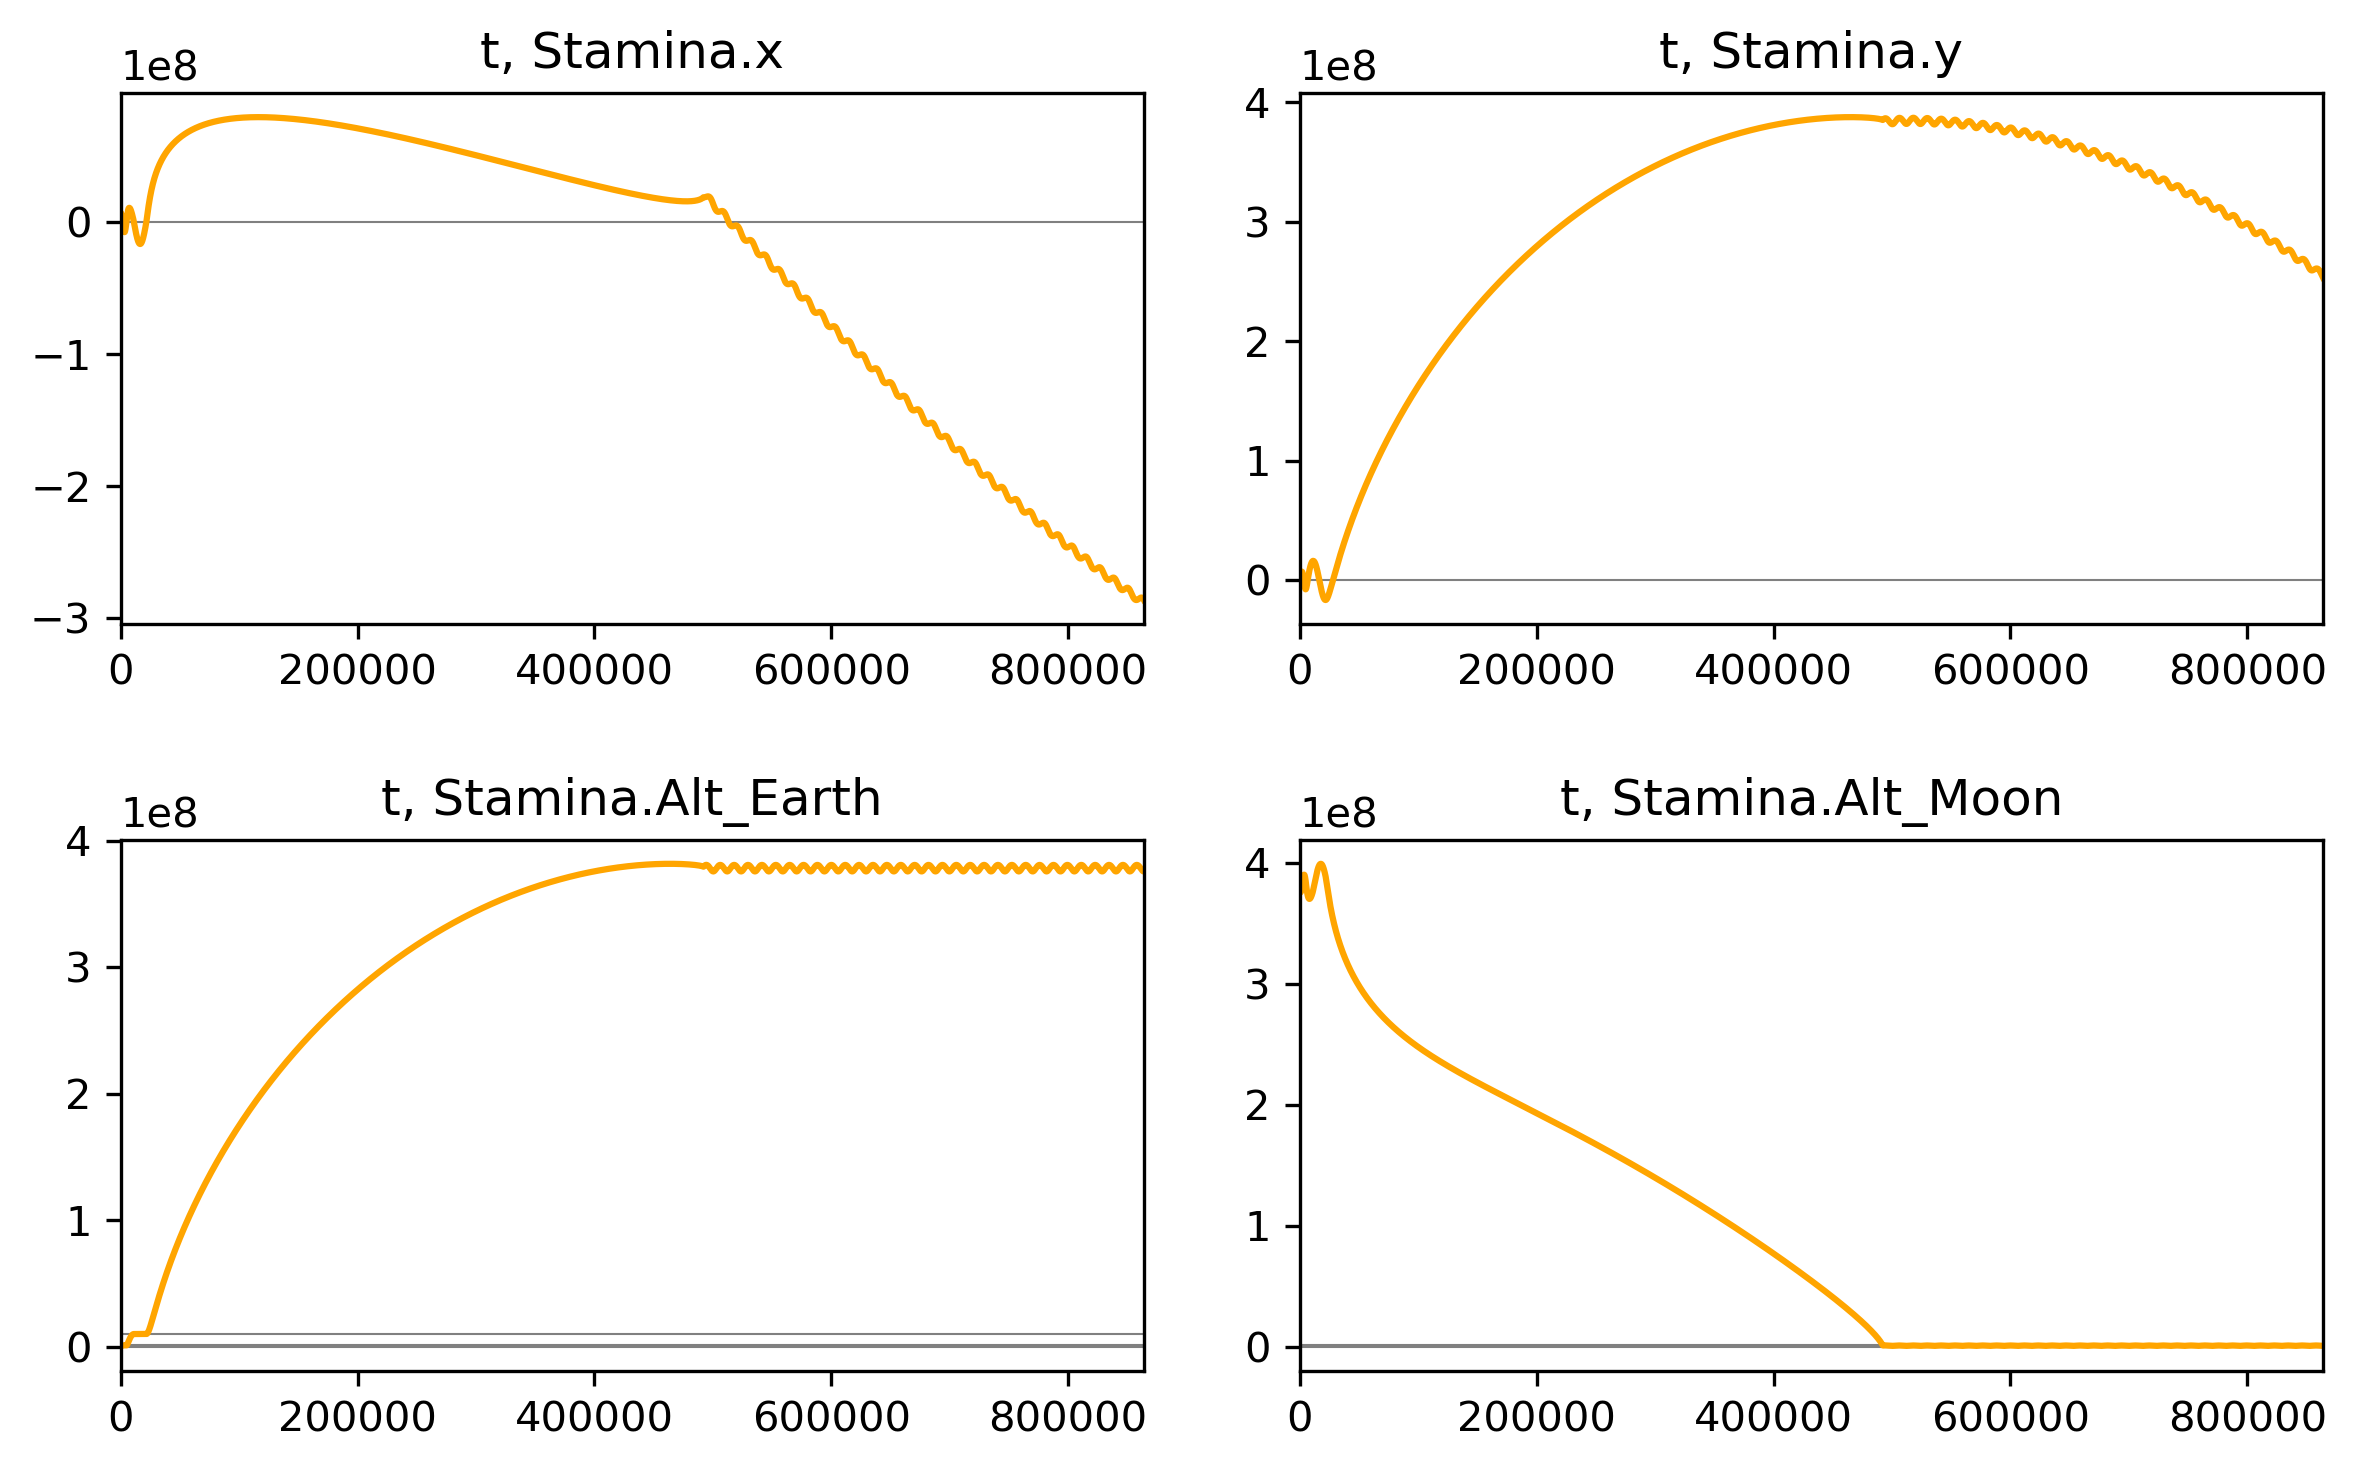

In [66]:
def graph_Position():
    plt.figure(figsize=(8,5), dpi = 300)
    plt.subplot(221)
    plt.title('t, Stamina.x')
    plt.plot(t, Stamina.x, "orange")
    graph_Common_Settings()
    plt.subplot(222)
    plt.title('t, Stamina.y')
    plt.plot(t, Stamina.y, "orange")
    graph_Common_Settings()
    plt.subplot(223)
    plt.title('t, Stamina.Alt_Earth')
    plt.plot(t, Stamina.Alt_Earth, "orange")
    plt.hlines(Stamina.TargetAltitude, t[0], t[i+1], "gray", linewidth=0.5)
    plt.hlines(Stamina.TargetAltitude2, t[0], t[i+1], "gray", linewidth=0.5)
    graph_Common_Settings()
    plt.subplot(224)
    plt.title('t, Stamina.Alt_Moon')
    plt.plot(t, Stamina.Alt_Moon, "orange")
    plt.hlines(Stamina.TargetMoonAltitude, t[0], t[i+1], "gray", linewidth=0.5)
    graph_Common_Settings()
    plt.tight_layout(w_pad=2.0, h_pad=2.0)
    plt.show()
graph_Position()

## Velocity Graphs
The velocity graphs visualize $v_x$, $v_y$, and $\|\mathbf{v}\|$ with respect to $t$.

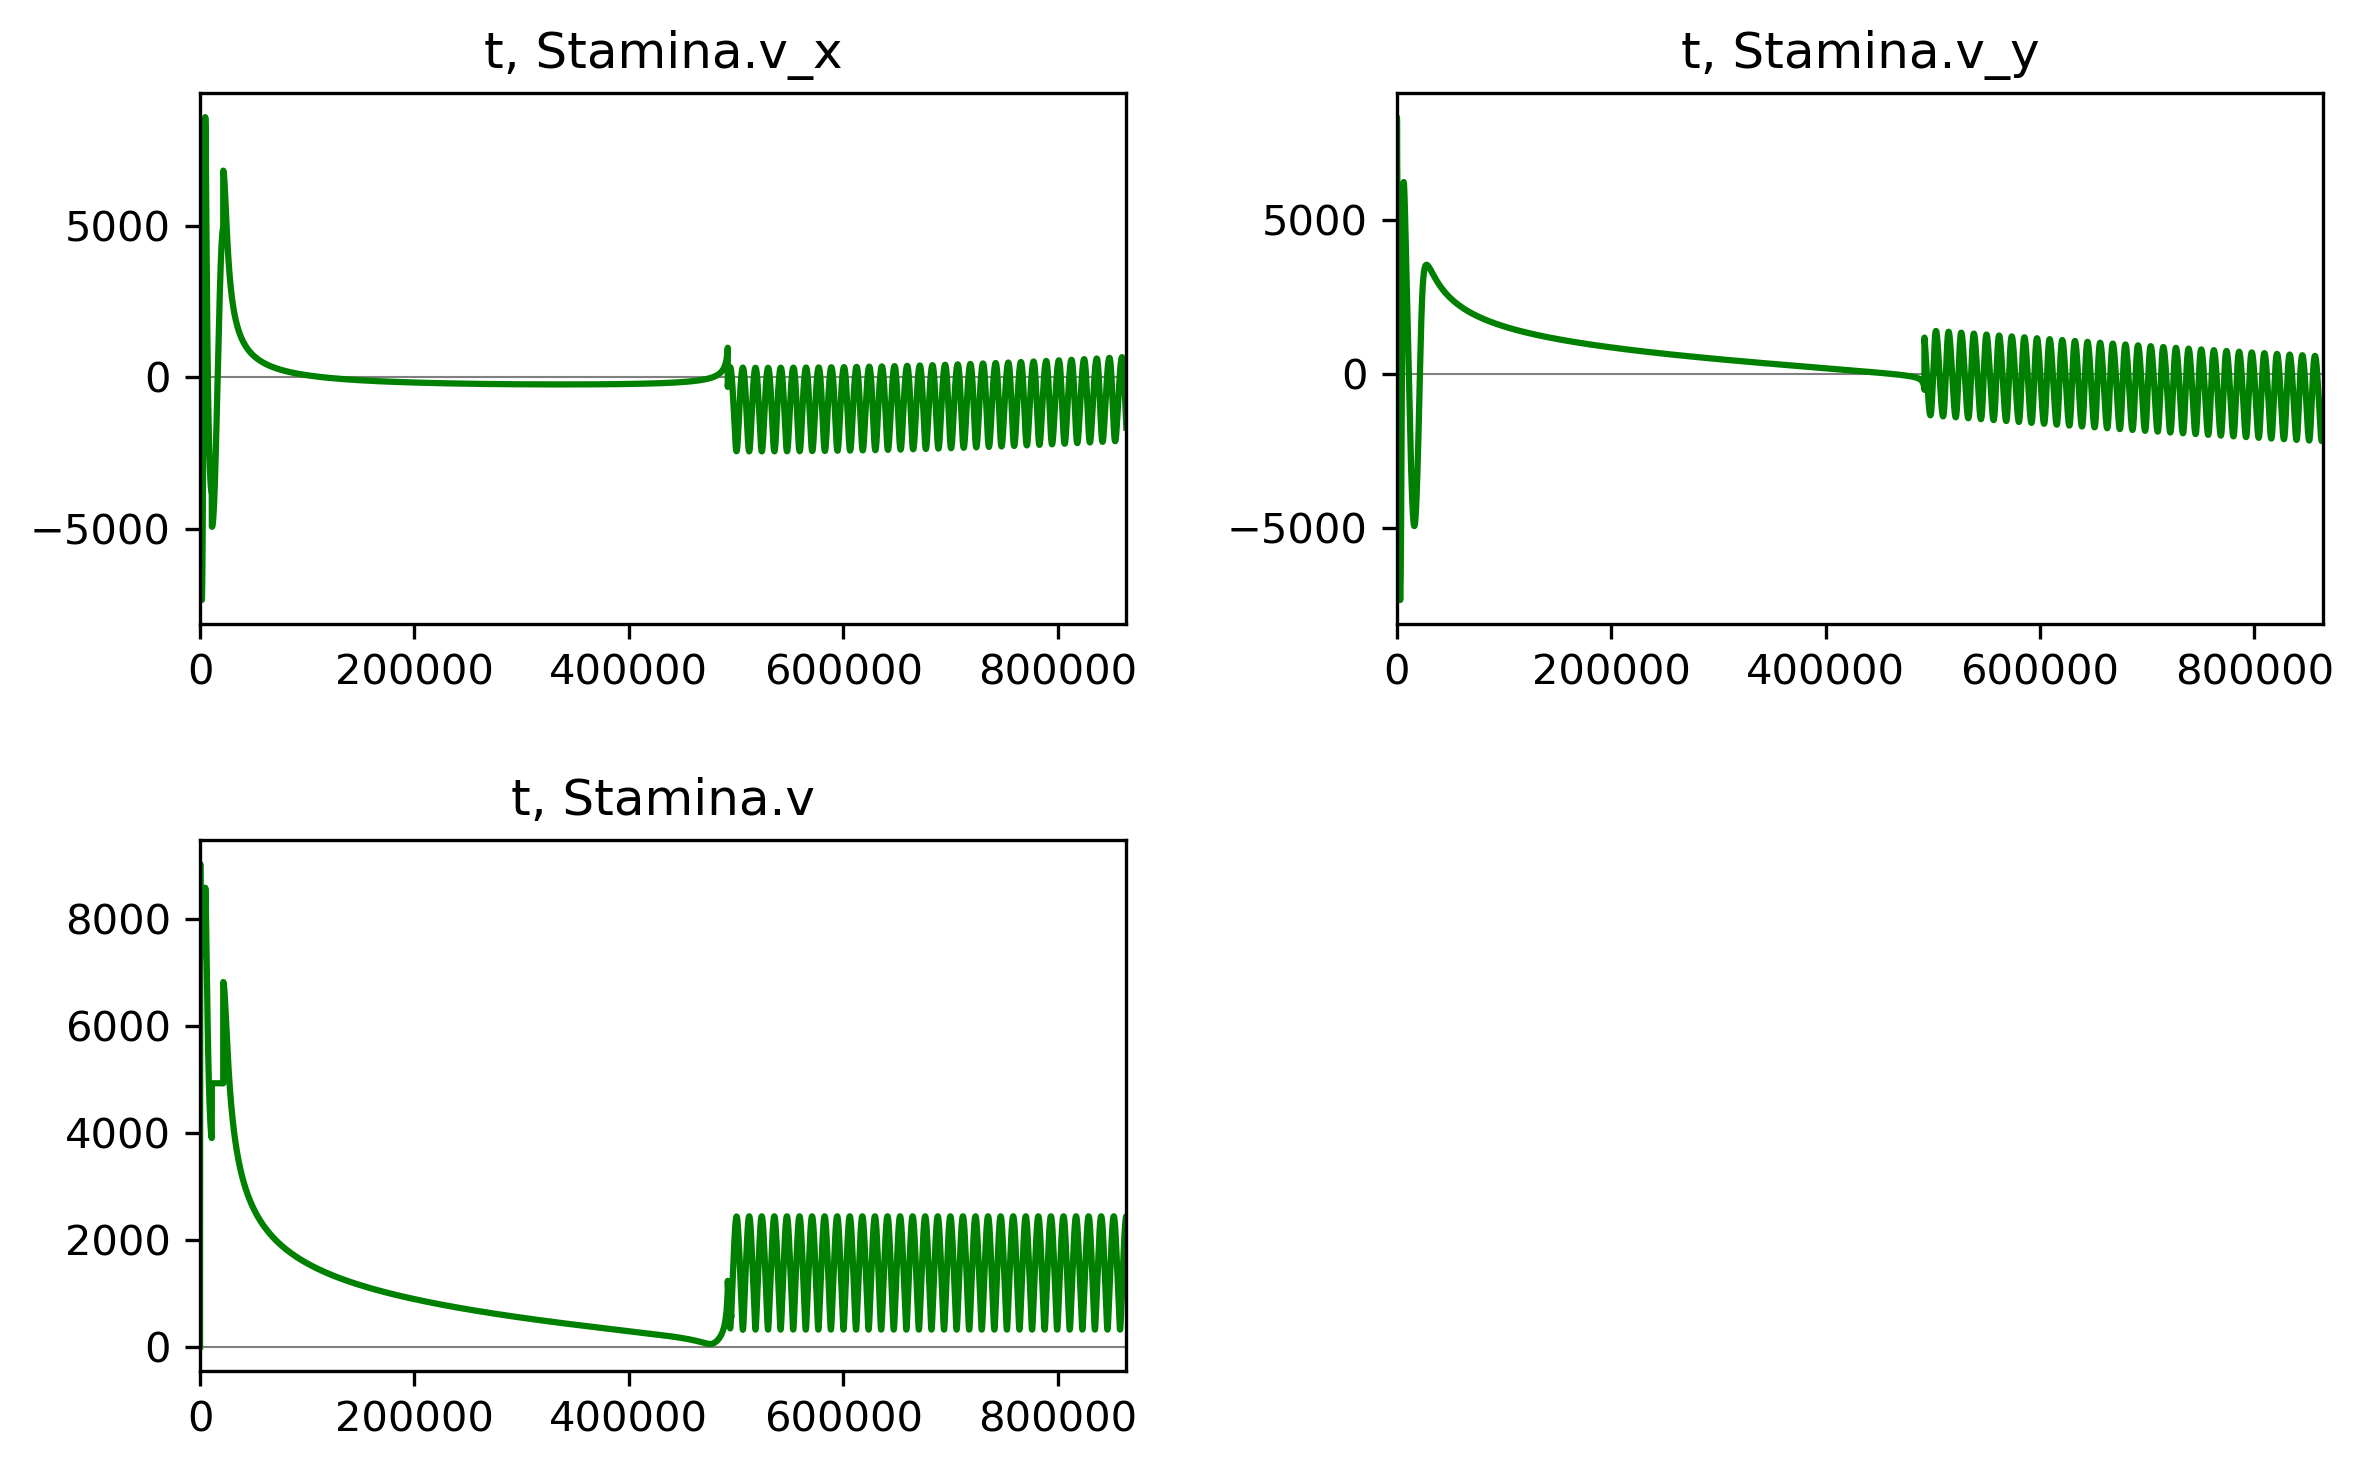

In [30]:
def graph_Velocity():
    plt.figure(figsize=(8,5), dpi = 300)
    plt.subplot(221)
    plt.title('t, Stamina.v_x')
    plt.plot(t, Stamina.v_x, "green")
    graph_Common_Settings()
    plt.subplot(222)
    plt.title('t, Stamina.v_y')
    plt.plot(t, Stamina.v_y, "green")
    graph_Common_Settings()
    plt.subplot(223)
    plt.title('t, Stamina.v')
    plt.plot(t, Stamina.v, "green")
    graph_Common_Settings()
    plt.tight_layout(w_pad=2.0, h_pad=2.0)
    plt.show()
graph_Velocity()

## Acceleration Graphs
The acceleration graphs visualize $a_x$, $a_y$, and $\|\mathbf{a}\|$ with respect to $t$.

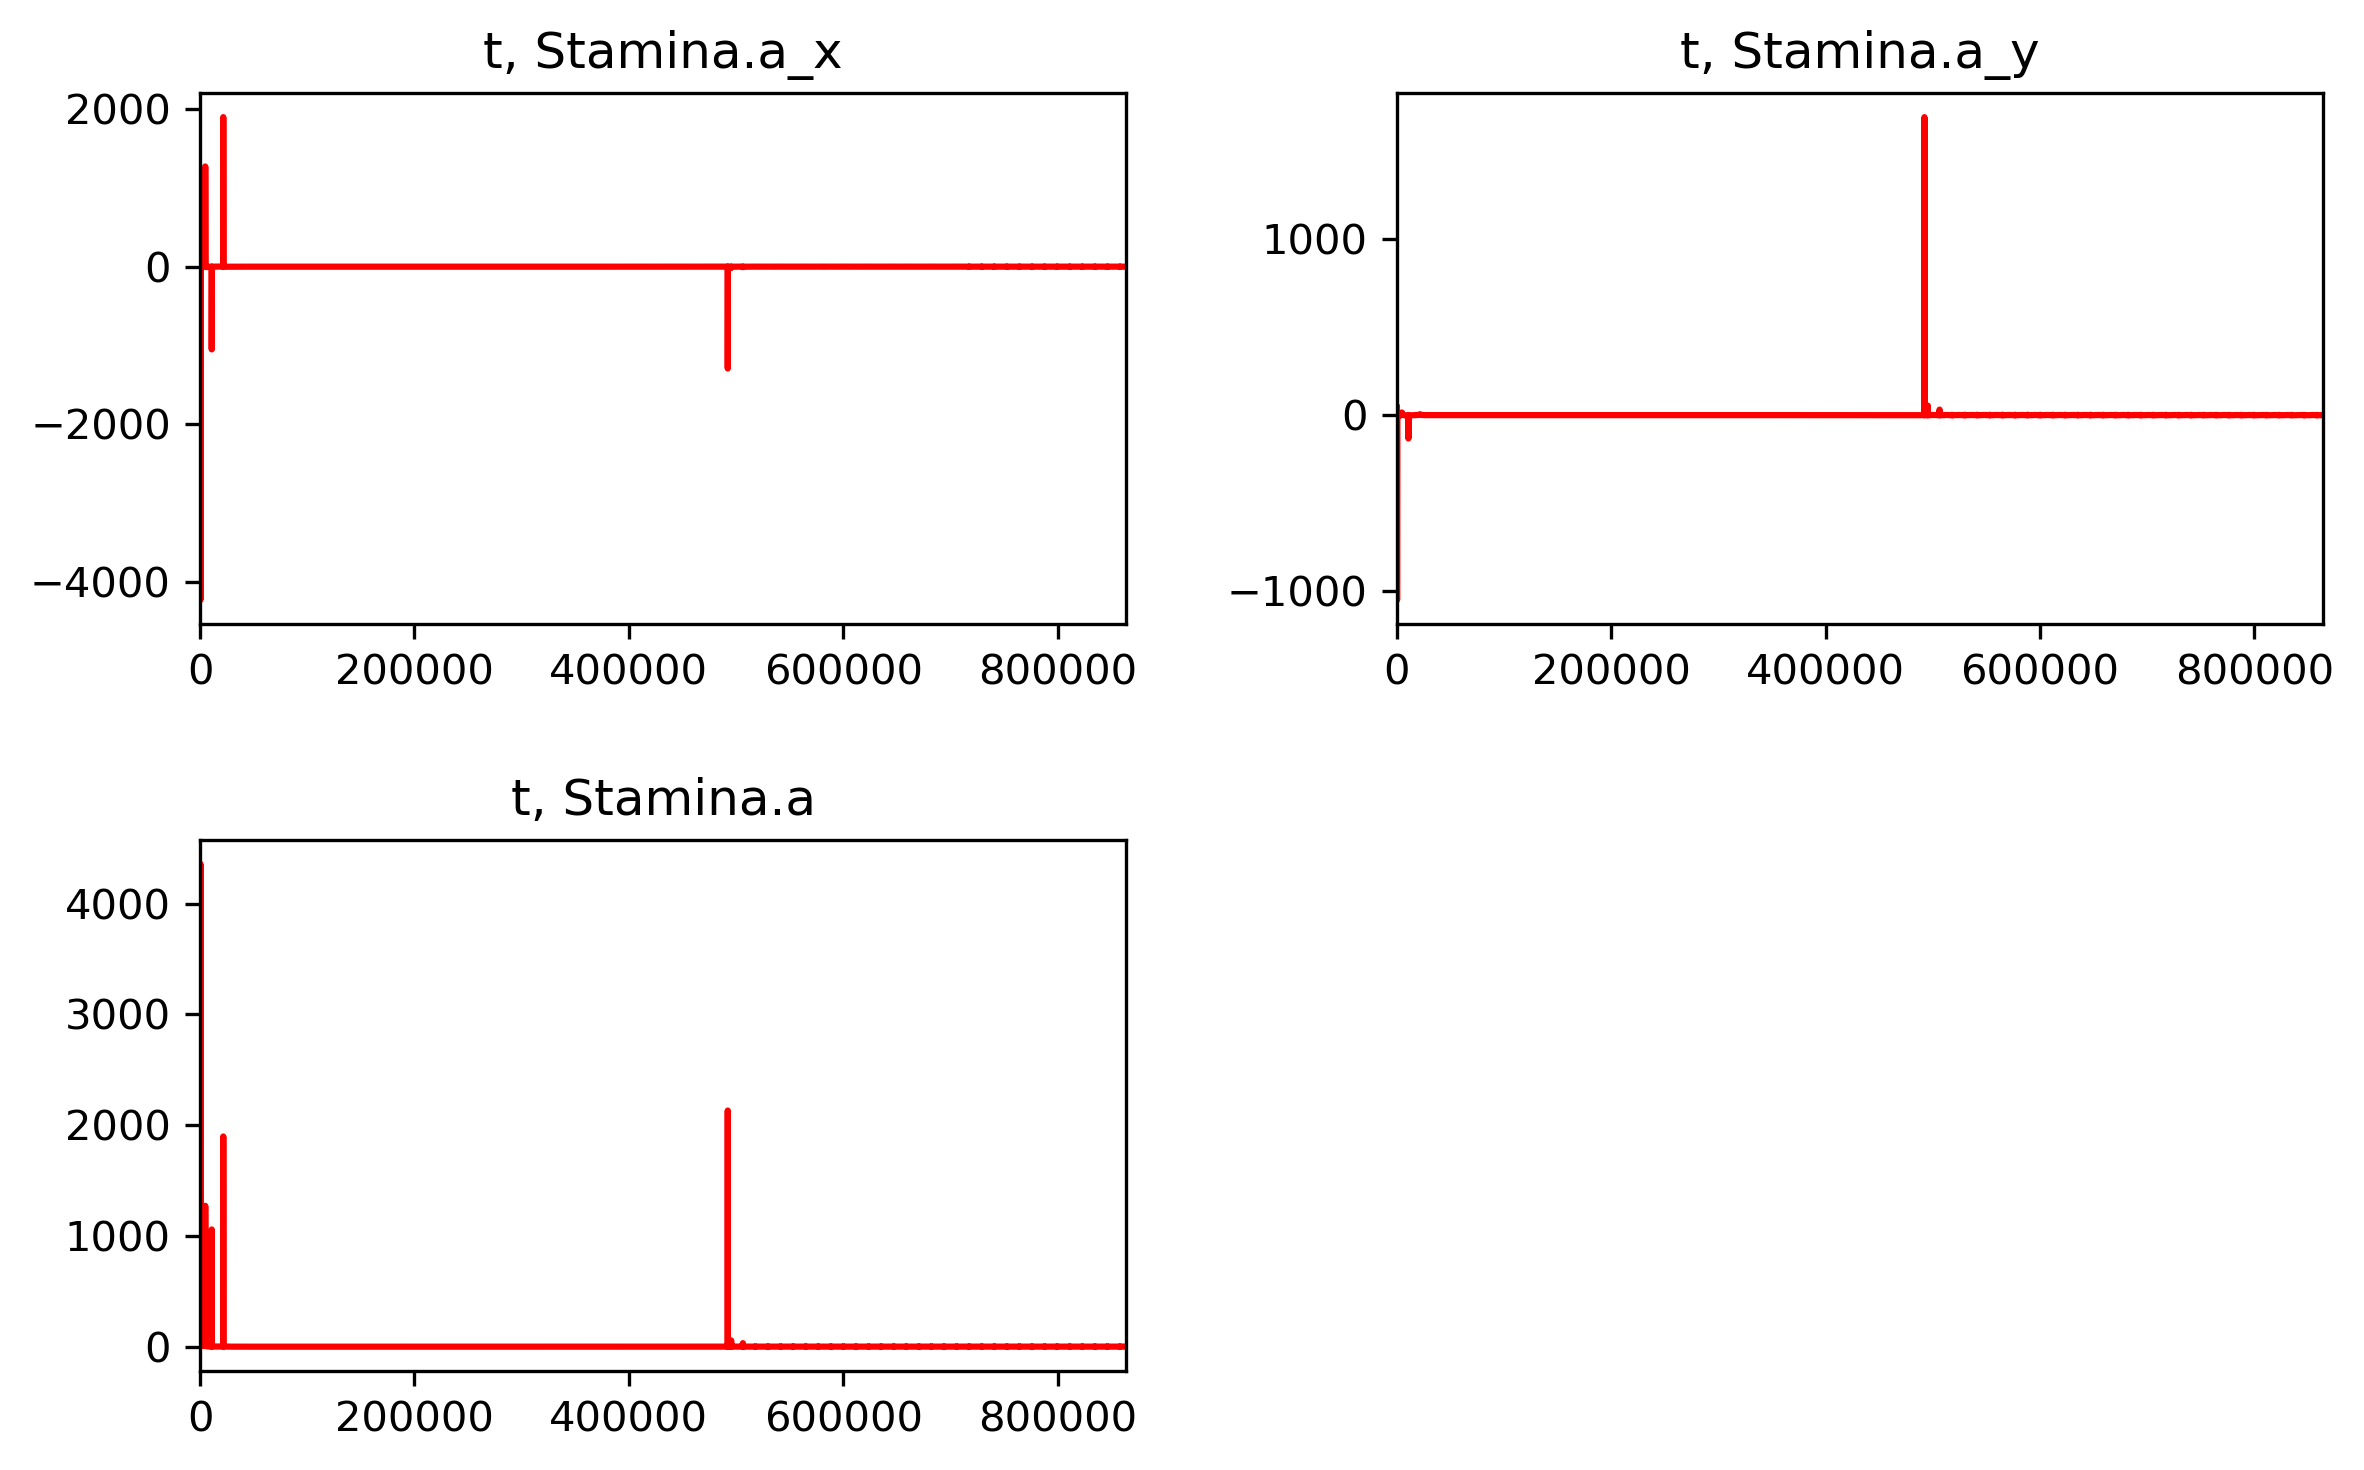

In [31]:
def graph_Acceleration():
    plt.figure(figsize=(8,5), dpi = 300)
    plt.subplot(221)
    plt.title('t, Stamina.a_x')
    plt.plot(t, Stamina.a_x, "red")
    graph_Common_Settings()
    plt.subplot(222)
    plt.title('t, Stamina.a_y')
    plt.plot(t, Stamina.a_y, "red")
    graph_Common_Settings()
    plt.subplot(223)
    plt.title('t, Stamina.a')
    plt.plot(t, Stamina.a, "red")
    graph_Common_Settings()
    plt.tight_layout(w_pad=2.0, h_pad=2.0)
    plt.show()
graph_Acceleration()

## Force Graphs
The force graphs visualize $F_E$, $F_M$, and $F_r$ with respect to $t$.

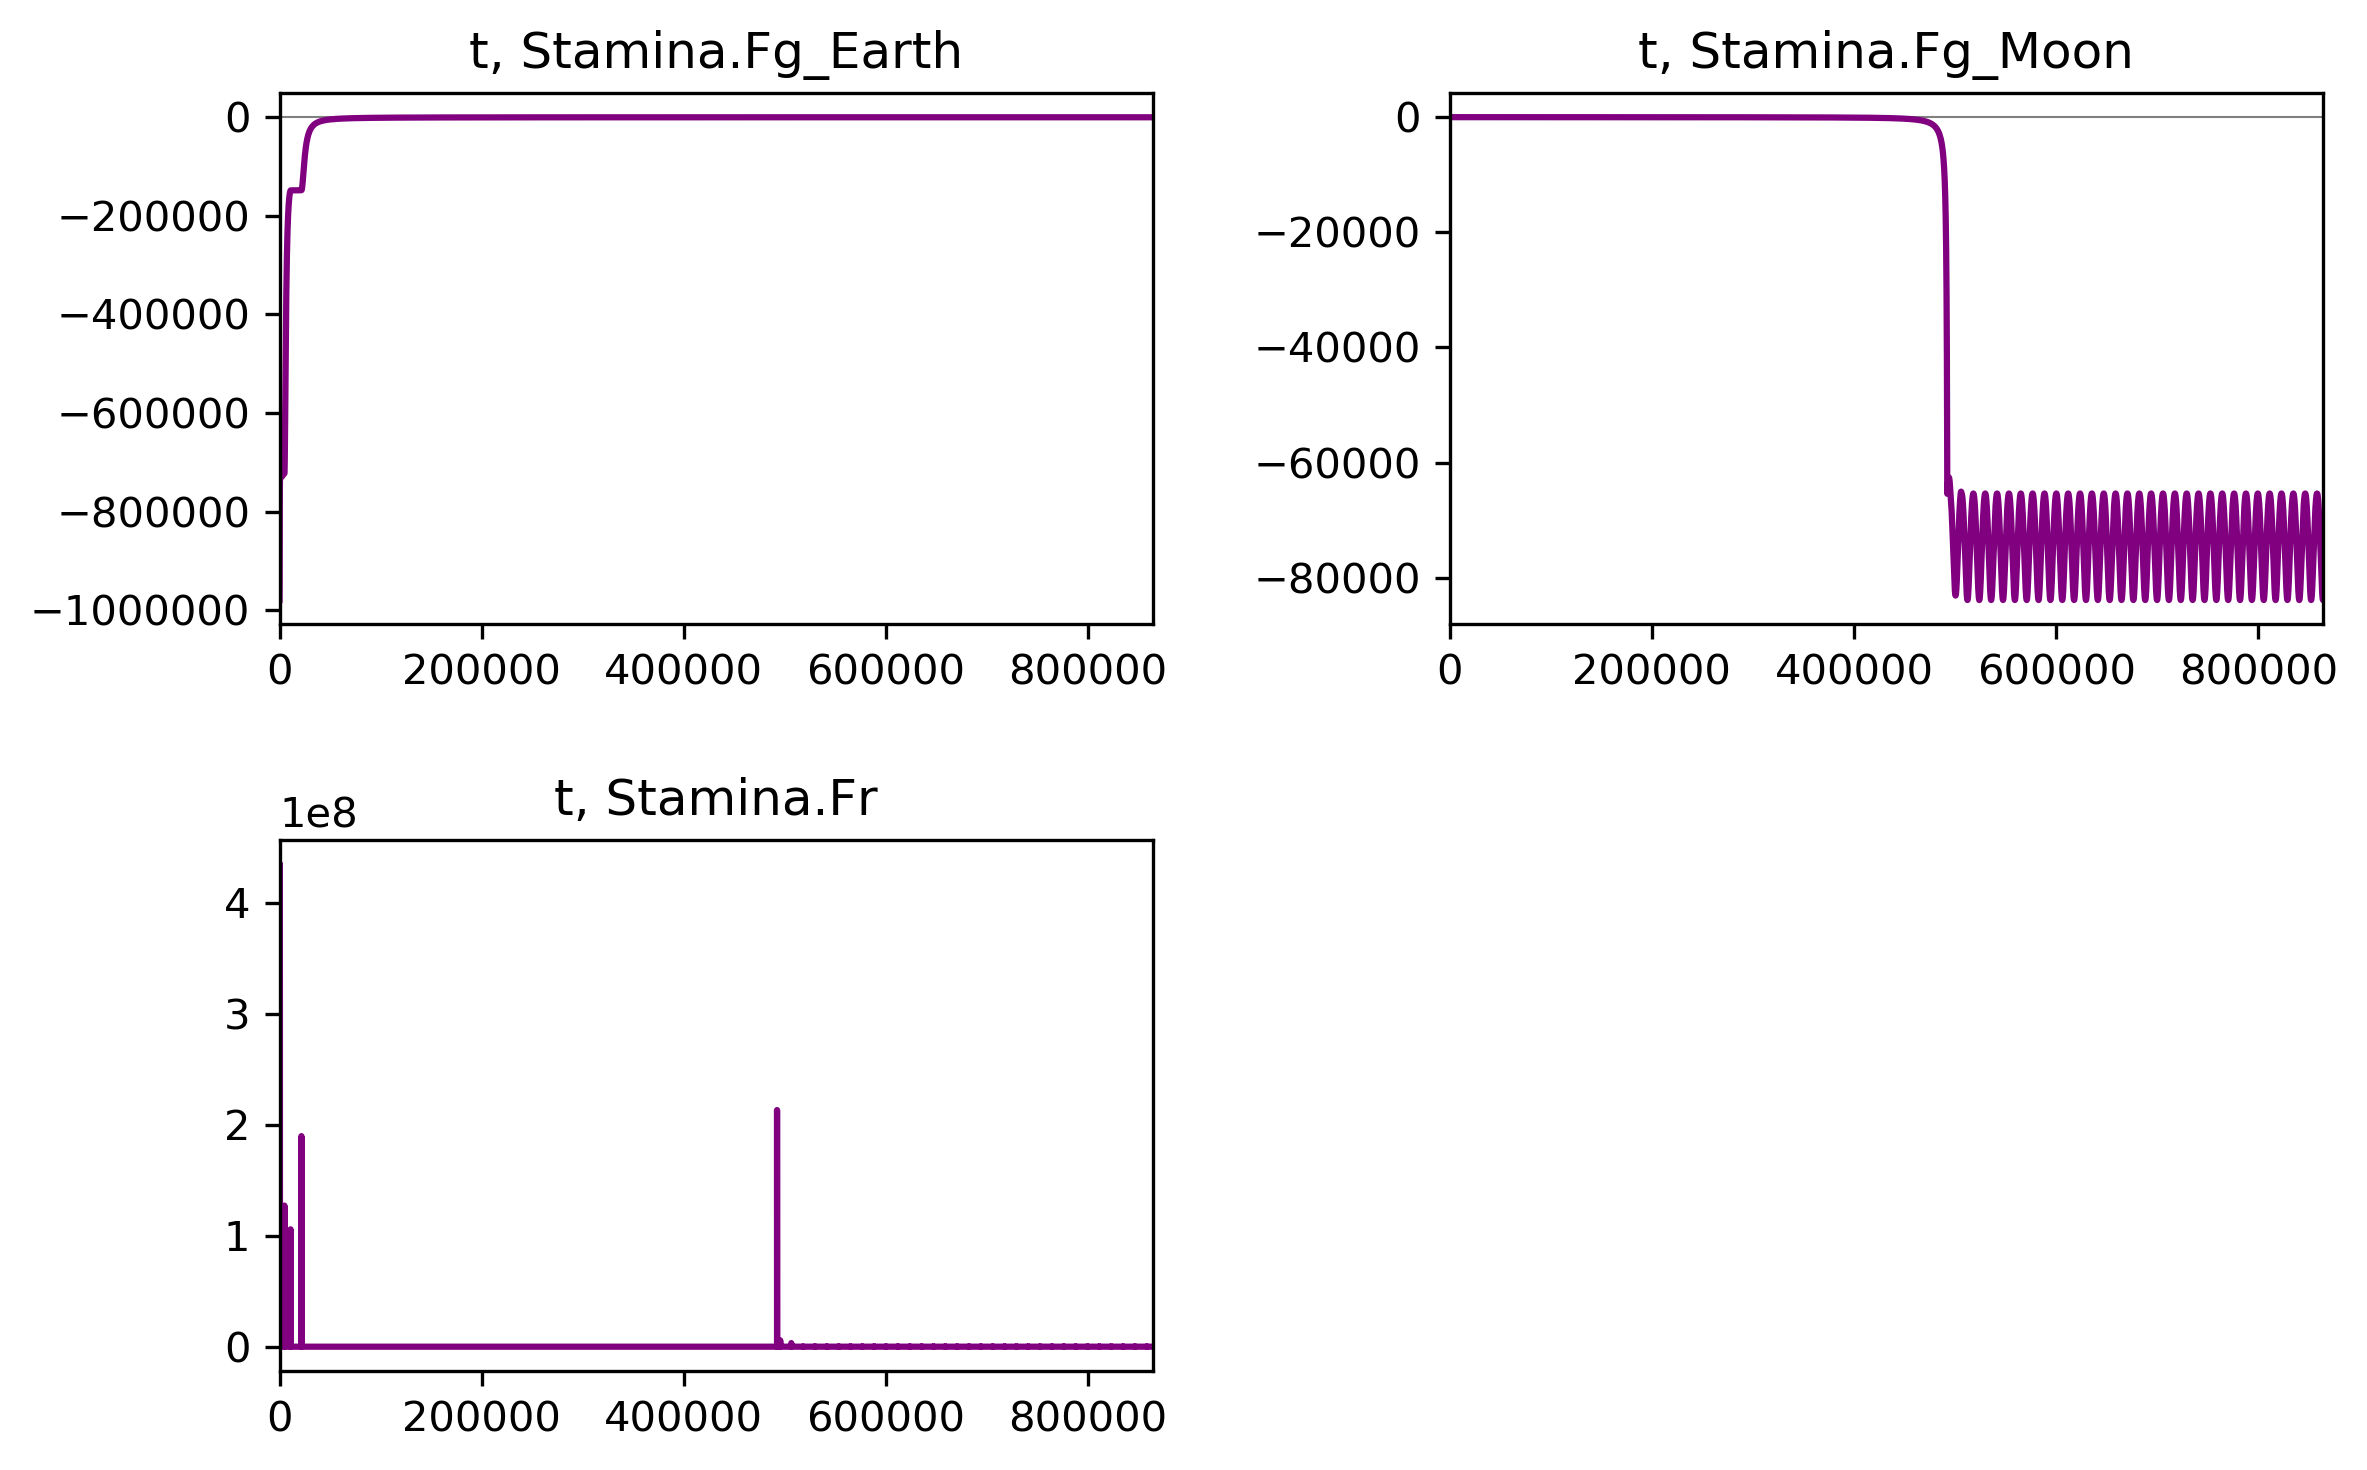

In [32]:
def graph_Force():
    plt.figure(figsize=(8,5), dpi = 300)
    plt.subplot(221)
    plt.title('t, Stamina.Fg_Earth')
    plt.plot(t, Stamina.Fg_Earth, "purple")
    graph_Common_Settings()
    plt.subplot(222)
    plt.title('t, Stamina.Fg_Moon')
    plt.plot(t, Stamina.Fg_Moon, "purple")
    graph_Common_Settings()
    plt.subplot(223)
    plt.title('t, Stamina.Fr')
    plt.plot(t, Stamina.Fr, "purple")
    graph_Common_Settings()
    plt.tight_layout(w_pad=2.0, h_pad=2.0)
    plt.show()
graph_Force()

## Angle Graphs
The angle grpahs visualize $\epsilon$, $\theta$, $\phi$, and $\tau$ with respect to $t$.

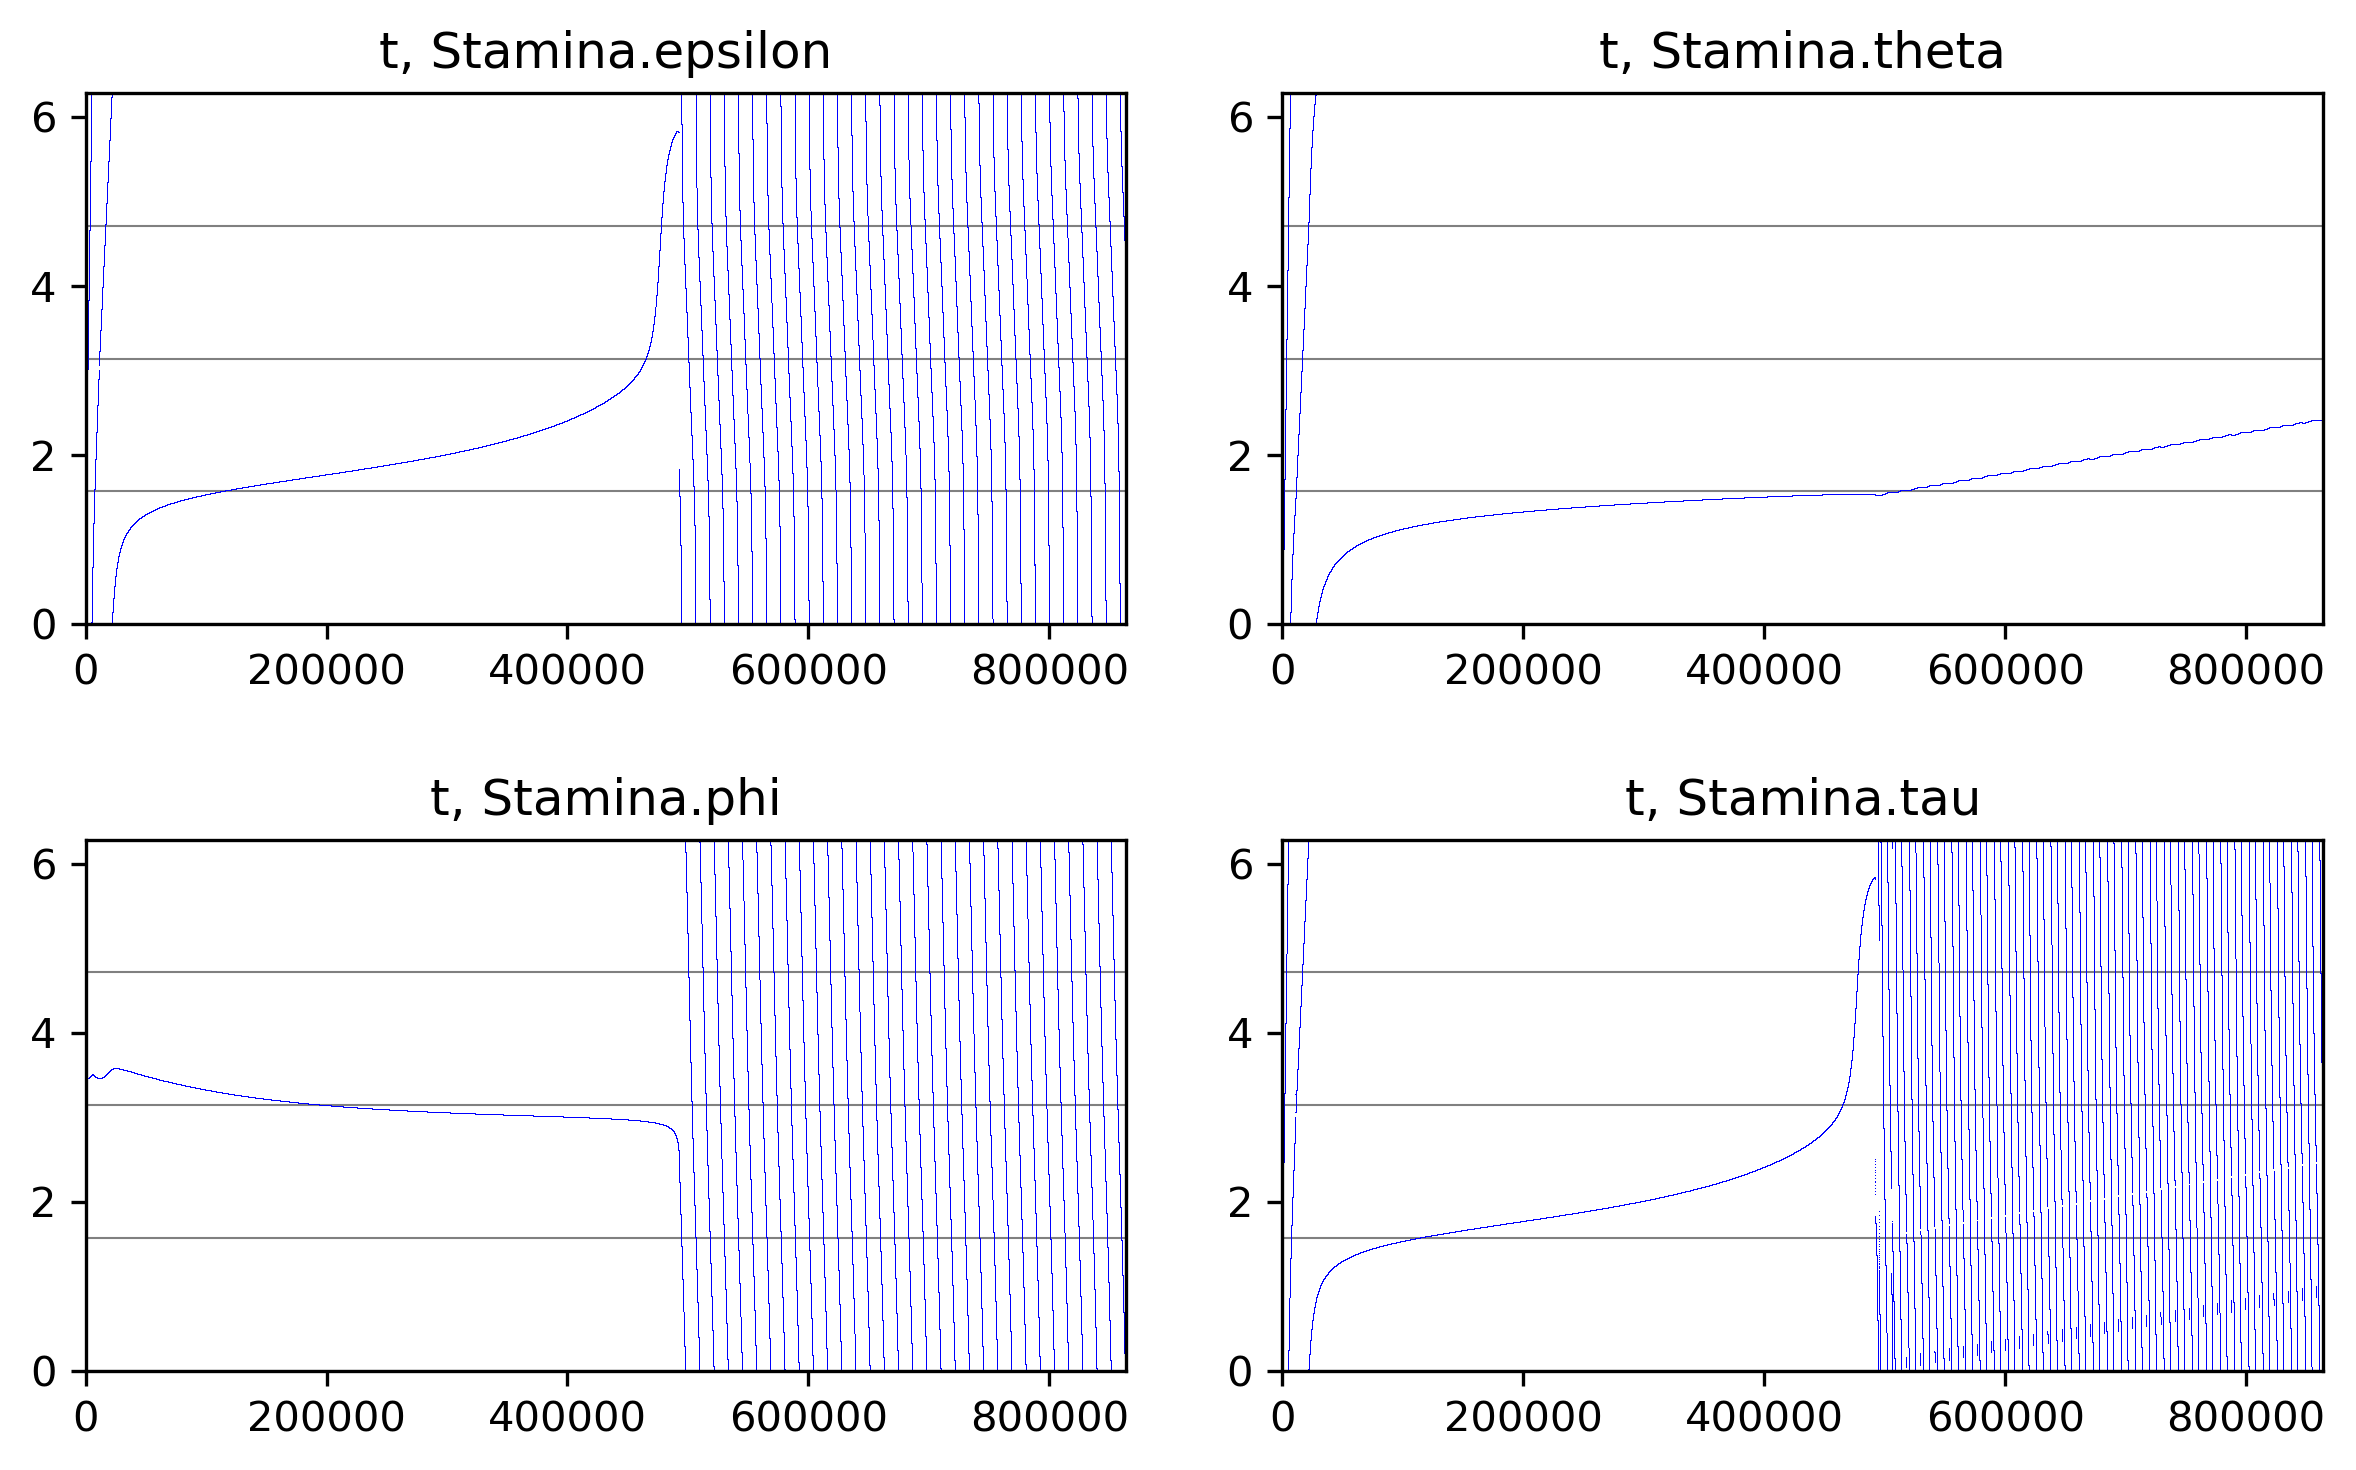

In [33]:
def graph_Angles_Settings():
    plt.hlines(0, t[0], t[i+1], "gray", linewidth=0.5)
    plt.hlines(pi/2, t[0], t[i+1], "gray", linewidth=0.5)
    plt.hlines(pi, t[0], t[i+1], "gray", linewidth=0.5)
    plt.hlines(pi * 3 / 2, t[0], t[i+1], "gray", linewidth=0.5)
    plt.hlines(twopi, t[0], t[i+1], "gray", linewidth=0.5)
    plt.xlim(xmin=0)
    plt.xlim(xmax=t[i+1])
    plt.ylim(ymin=0)
    plt.ylim(ymax=twopi)

def graph_Angles():
    plt.figure(figsize=(8,5), dpi = 300)
    plt.subplot(221)
    plt.title('t, Stamina.epsilon')
    plt.plot(t, Stamina.epsilon, ',', color="blue")
    graph_Angles_Settings()
    plt.subplot(222)
    plt.title('t, Stamina.theta')
    plt.plot(t, Stamina.theta, ',', color="blue")
    graph_Angles_Settings()
    plt.subplot(223)
    plt.title('t, Stamina.phi')
    plt.plot(t, Stamina.phi, ',', color="blue")
    graph_Angles_Settings()
    plt.subplot(224)
    plt.title('t, Stamina.tau')
    plt.plot(t, Stamina.tau, ',', color="blue")
    graph_Angles_Settings()
    plt.tight_layout(w_pad=2.0, h_pad=2.0)
    plt.show()
graph_Angles()

## Graph in Proximity of the Earth
The graph visualizes the trajectory of the rocket in proximity of the Earth. When debugging, it can be used to analyze the relative position of the Earth and the rocket and the orbit of the Earth.

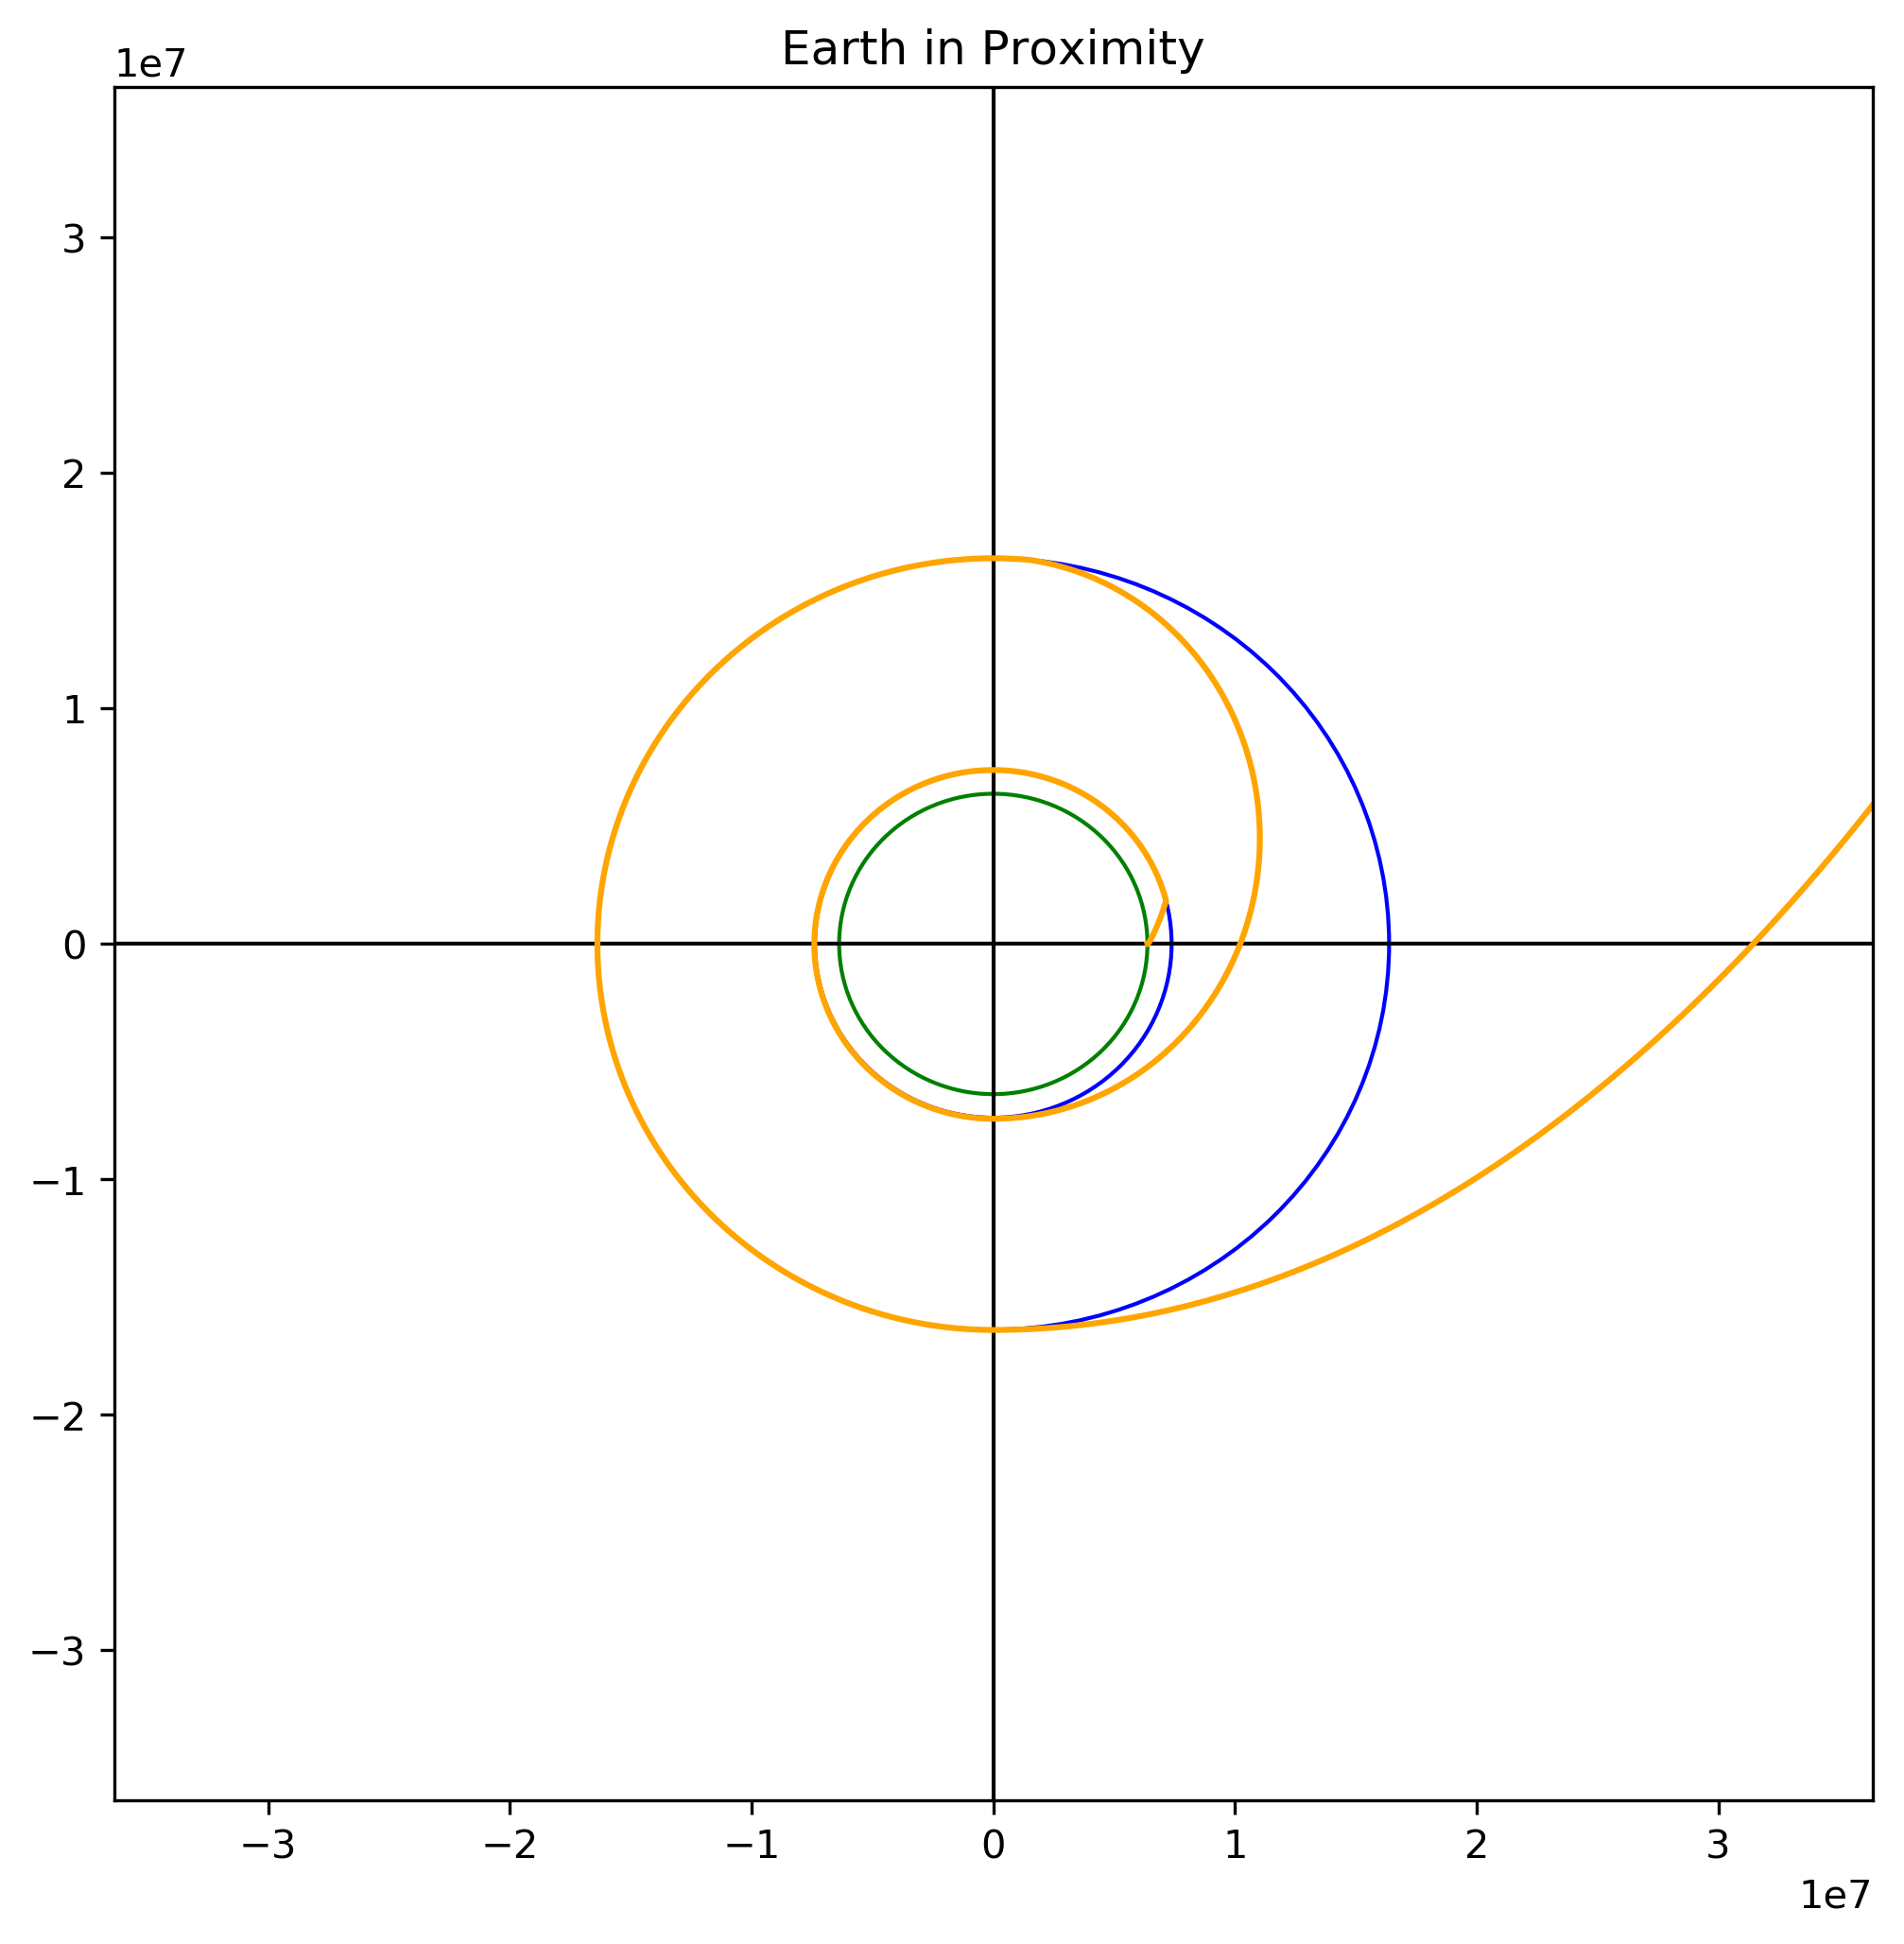

In [48]:
def graph_EarthProximity():
    fig=plt.figure(figsize=(8,8), dpi = 300)
    ax=fig.add_subplot(1,1,1)
    plt.title('Earth in Proximity')
    plt.plot(Stamina.x, Stamina.y, color="orange")
    #plt.plot(Interstellar.x, Interstellar.y, color="brown")
    plt.xlim(xmin=-Earth.radius-3e7)
    plt.xlim(xmax=Earth.radius+3e7)
    plt.ylim(ymin=-Earth.radius-3e7)
    plt.ylim(ymax=Earth.radius+3e7)
    plt.hlines(0, -Moon.dE, Moon.dE, "black", linewidth=1.0)
    plt.vlines(0, -Moon.dE, Moon.dE, "black", linewidth=1.0)
    ax.add_patch(plt.Circle((0,0), Earth.radius, color="green", fill=None))
    ax.add_patch(plt.Circle((0,0), Stamina.TargetAltitude + Earth.radius, 
                            color="blue", fill=None))
    ax.add_patch(plt.Circle((0,0), Stamina.TargetAltitude2 + Earth.radius, 
                            color="blue", fill=None))
    ax.add_patch(plt.Circle((Stamina.x[t.index(max(t))],
                                       Stamina.y[t.index(max(t))]), 
                            5e4, color="orange", fill=True))
    plt.show()

graph_EarthProximity()

## Graph in Proximity of the Moon
The graph visualizes the trajectory of the rocket in proximity of the Moon. When debugging, it can be used to analyze the relative position of the Moon and the rocket.

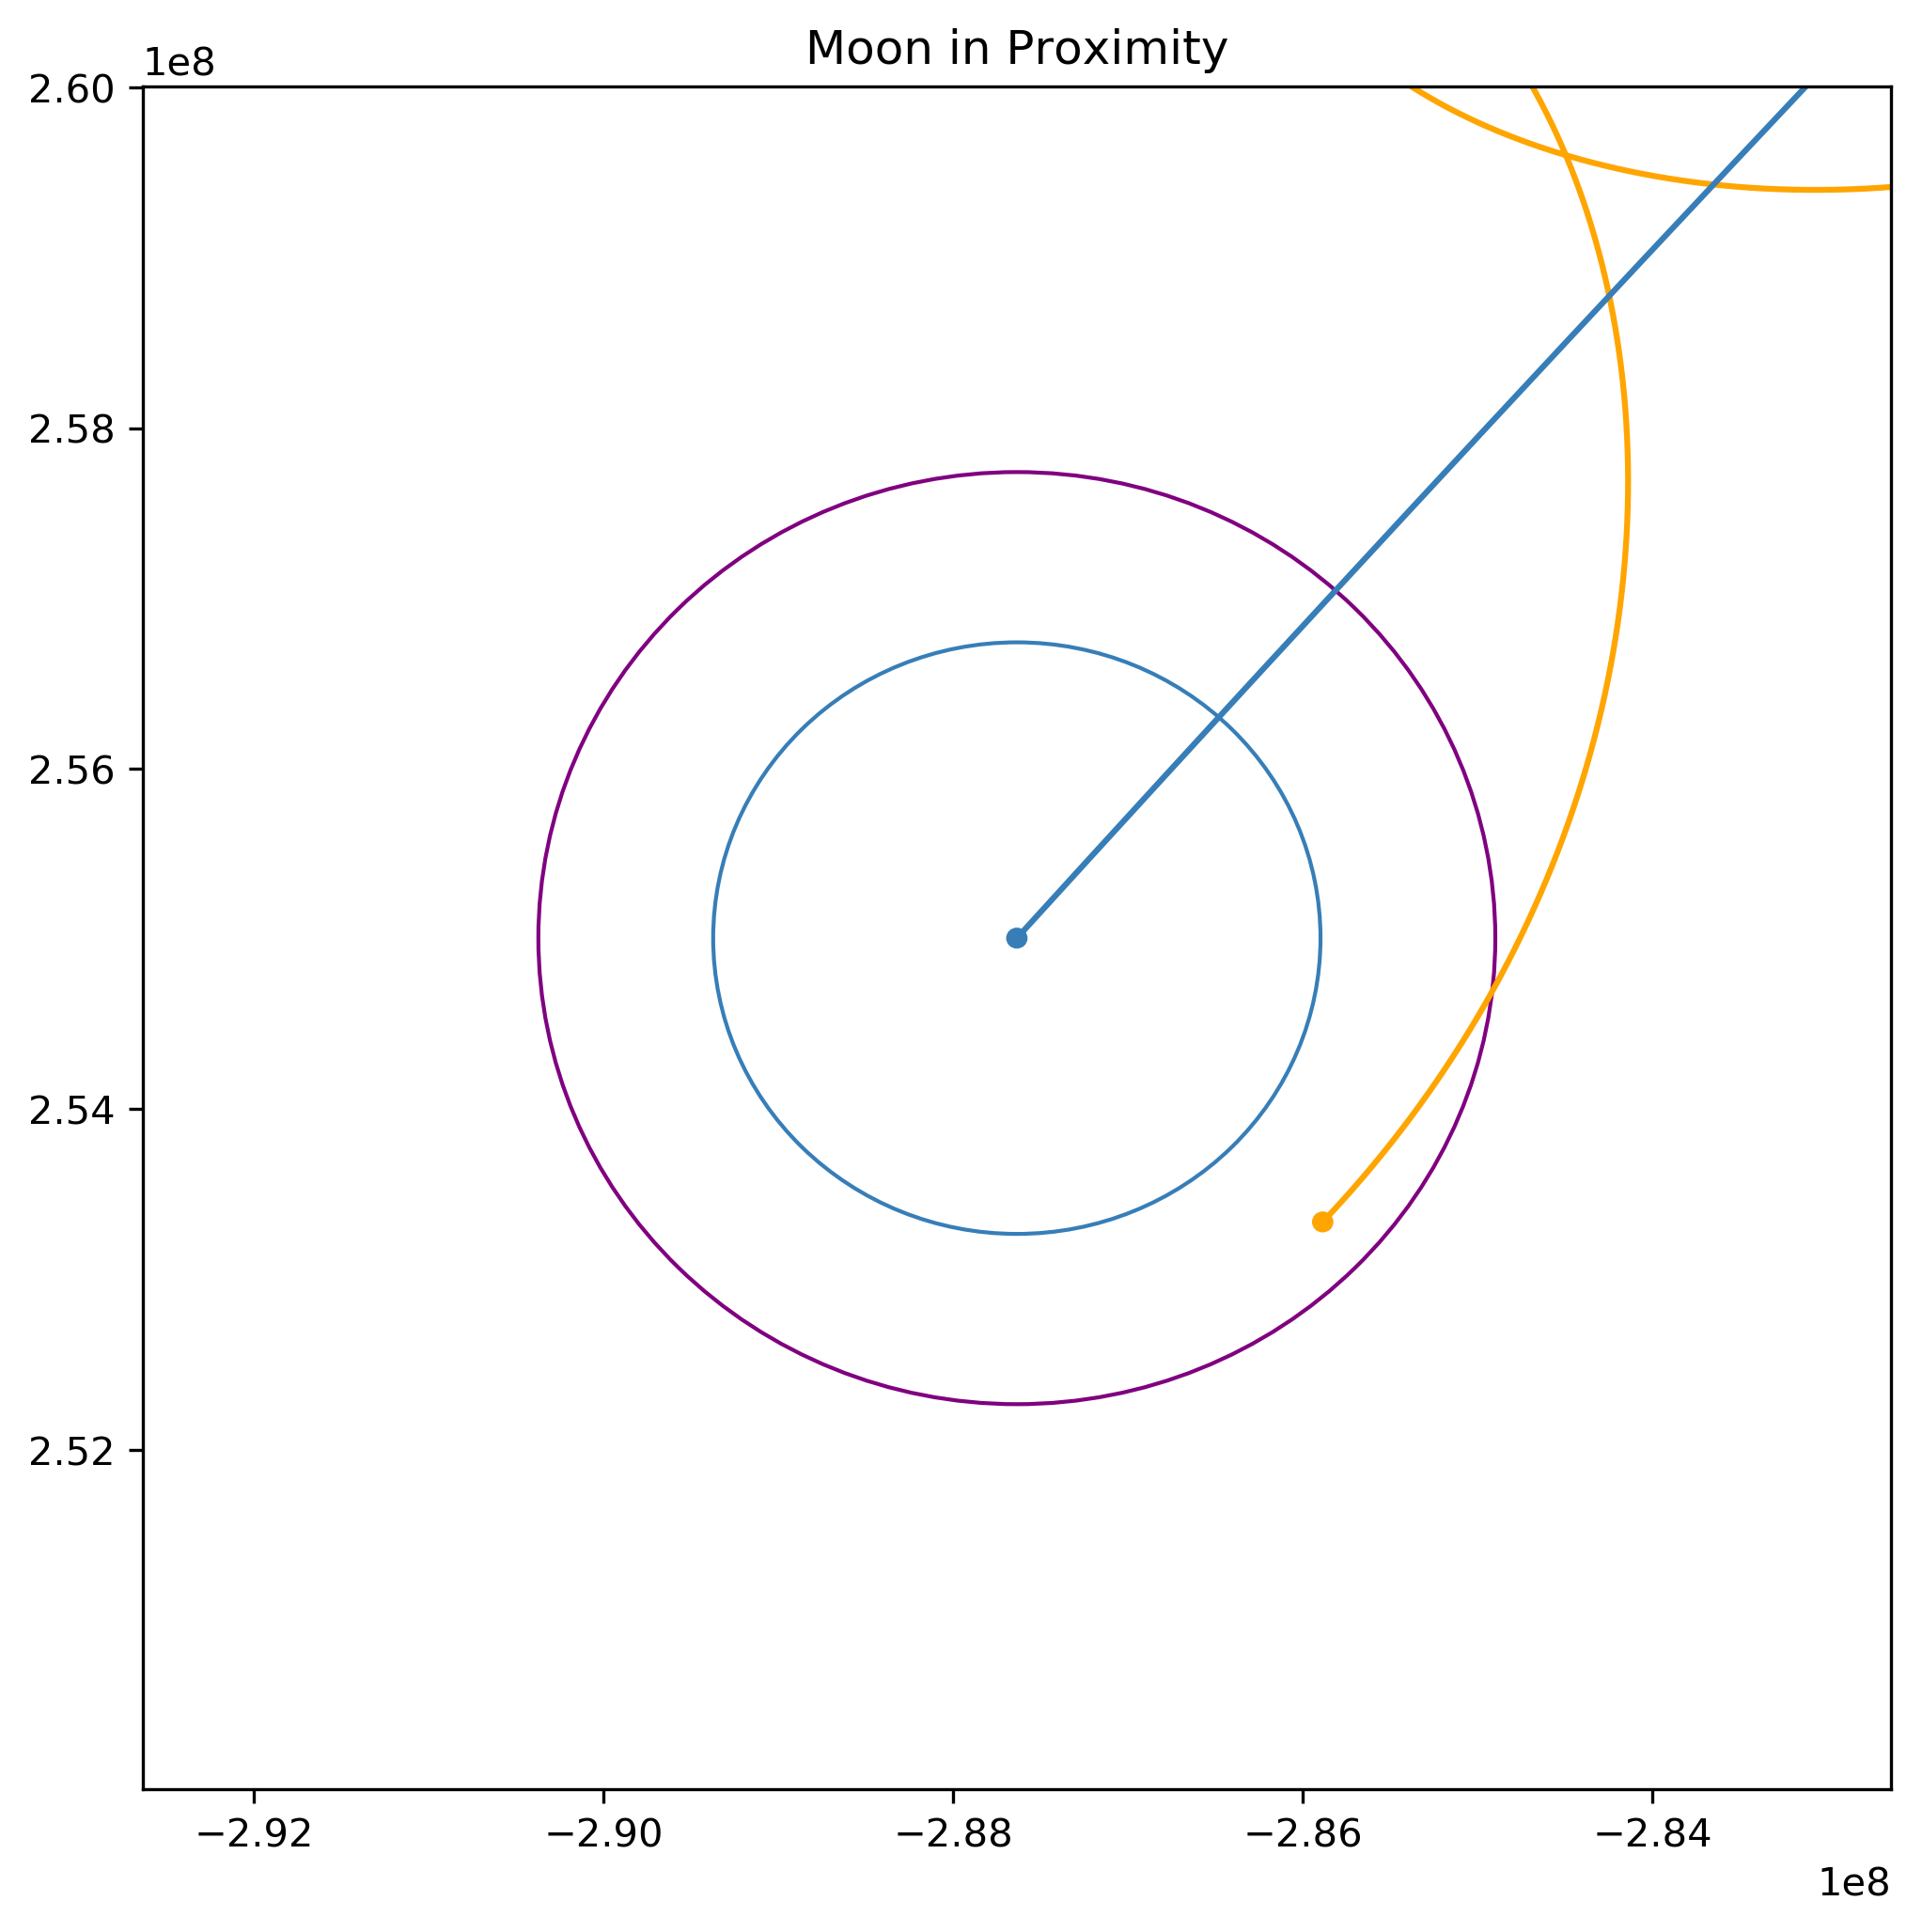

In [50]:
def graph_MoonProximity():
    fig=plt.figure(figsize=(8,8), dpi = 300)
    ax=fig.add_subplot(1,1,1)
    plt.title('Moon in Proximity')
    plt.plot(Stamina.x, Stamina.y, color="orange")
    plt.plot(Moon.x, Moon.y, color="#377EB8")
    plt.xlim(xmin=Moon.x[i+1]-5.0e6)
    plt.xlim(xmax=Moon.x[i+1]+5.0e6)
    plt.ylim(ymin=Moon.y[i+1]-5.0e6)
    plt.ylim(ymax=Moon.y[i+1]+5.0e6)
    ax.add_patch(plt.Circle((0,0), Earth.radius, color="green", fill=None))
    ax.add_patch(plt.Circle((Stamina.x[t.index(max(t))],
                                       Stamina.y[t.index(max(t))]),
                            5e4, color="orange", fill=True))
    ax.add_patch(plt.Circle((Moon.x[t.index(max(t))],Moon.y[t.index(max(t))]), 
                            5e4, color="#377EB8", fill=True))
    ax.add_patch(plt.Circle((Moon.x[t.index(max(t))],Moon.y[t.index(max(t))]), 
                            Moon.radius, color="#377EB8", fill=None))
    ax.add_patch(plt.Circle((Moon.x[t.index(max(t))],Moon.y[t.index(max(t))]), 
                            Moon.radius + Stamina.TargetMoonAltitude, 
                            color="purple", fill=None))
    plt.show()

graph_MoonProximity()

## Graph of Earth Surface
The graph visualizes the trajectory of the rocket close to the Earth surface. When debugging, it can be used to visualize the procedure turn.

In [58]:
def graph_EarthSurface():
    fig=plt.figure(figsize=(8,8), dpi = 300)
    ax=fig.add_subplot(1,1,1)
    plt.title('Earth Surface')
    plt.plot(Stamina.x, Stamina.y, color="orange")
    plt.xlim(xmin=Earth.radius-1e4)
    plt.xlim(xmax=Earth.radius+1e6*2)
    plt.ylim(ymin=-1e6)
    plt.ylim(ymax=1e6)
    plt.hlines(0, -Moon.dE, Moon.dE, "black", linewidth=1.0)
    plt.vlines(0, -Moon.dE, Moon.dE, "black", linewidth=1.0)
    ax.add_patch(plt.Circle((0,0), Earth.radius, color="green", fill=None))
    ax.add_patch(plt.Circle((Stamina.x[t.index(max(t))],
                                       Stamina.y[t.index(max(t))]), 
                            5e3, color="orange", fill=True))
    plt.show()

#graph_EarthSurface()

## Graph of the Earth-Moon System
### Without Margin
The graph visualizes the trajectory of the rocket in the Earth-Moon system. When debugging, it can be used to identify the angle of the position vector and the final position. (This graph limits the view to the orbit of the Moon).

In [59]:
def graph_EarthMoon_Exact():
    fig=plt.figure(figsize=(8,8), dpi = 300)
    ax=fig.add_subplot(1,1,1)
    plt.title('Earth Moon')
    plt.plot(Moon.x, Moon.y, color="#377EB8")
    plt.plot(Stamina.x, Stamina.y, color="orange")
    plt.xlim(xmin=-Moon.dE)
    plt.xlim(xmax=Moon.dE)
    plt.ylim(ymin=-Moon.dE)
    plt.ylim(ymax=Moon.dE)
    plt.hlines(0, -Moon.dE, Moon.dE, "black", linewidth=1.0)
    plt.vlines(0, -Moon.dE, Moon.dE, "black", linewidth=1.0)
    ax.add_patch(plt.Circle((0,0), Earth.radius, color="green", fill=None))
    ax.add_patch(plt.Circle((Moon.x[t.index(max(t))],Moon.y[t.index(max(t))]), 
                            Moon.radius, color="#377EB8", fill=None))
    ax.add_patch(plt.Circle((Stamina.y[t.index(max(t))],
                                       Stamina.y[t.index(max(t))]), 
                            5e4, color="orange", fill=True))
    plt.show()

#graph_EarthMoon_Exact()

### With Margin
The graph visualizes the trajectory of the rocket in the Earth-Moon system. When debugging, it can be used to identify the angle of the position vector and the final position. (This graph provides view that is outside of the orbit of the Moon).

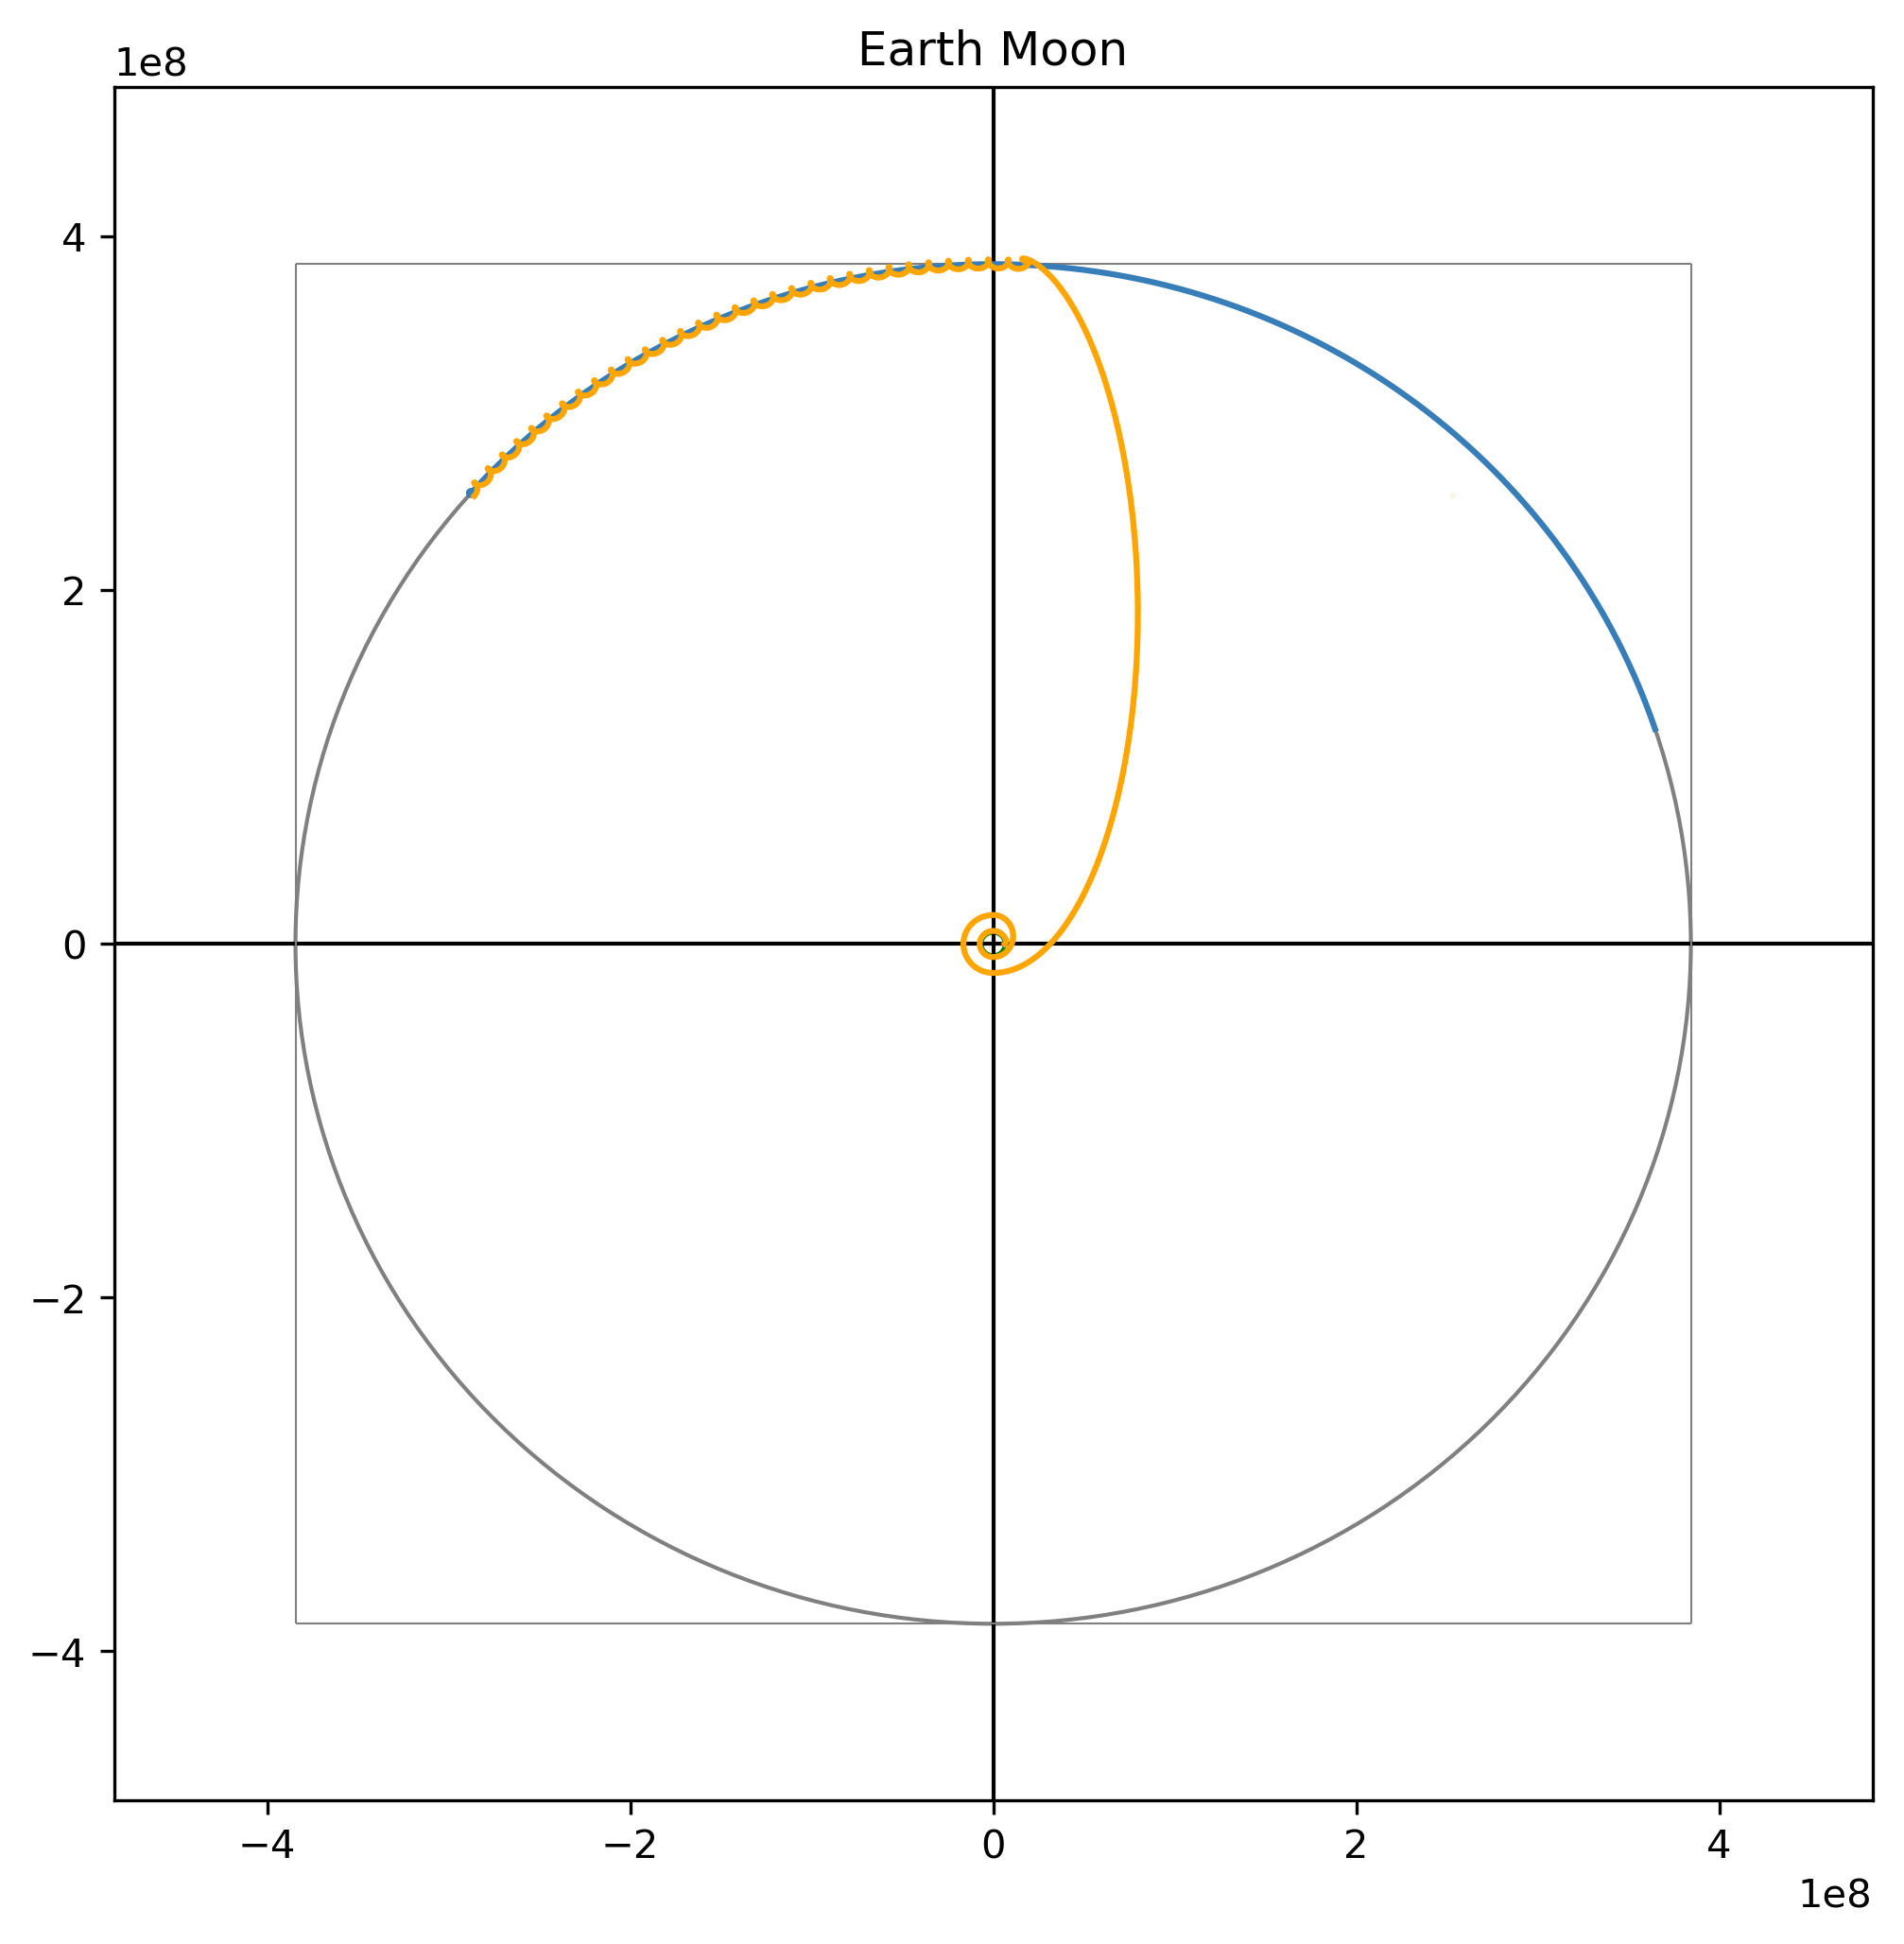

In [53]:
def graph_EarthMoon_Margin():
    fig=plt.figure(figsize=(8,8), dpi = 300)
    ax=fig.add_subplot(1,1,1)
    plt.title('Earth Moon')
    plt.plot(Moon.x, Moon.y, color="#377EB8")
    plt.plot(Stamina.x, Stamina.y, color="orange")
    plt.xlim(xmin=-Moon.dE - 1e8)
    plt.xlim(xmax=Moon.dE + 1e8)
    plt.ylim(ymin=-Moon.dE - 1e8)
    plt.ylim(ymax=Moon.dE + 1e8)
    plt.hlines(0, -Moon.dE - 1e8, Moon.dE + 1e8, "black", linewidth=1.0)
    plt.vlines(0, -Moon.dE - 1e8, Moon.dE + 1e8, "black", linewidth=1.0)
    plt.hlines(Moon.dE, -Moon.dE, Moon.dE, "gray", linewidth=0.5)
    plt.hlines(-Moon.dE, -Moon.dE, Moon.dE, "gray", linewidth=0.5)
    plt.vlines(Moon.dE, -Moon.dE, Moon.dE, "gray", linewidth=0.5)
    plt.vlines(-Moon.dE, -Moon.dE, Moon.dE, "gray", linewidth=0.5)
    ax.add_patch(plt.Circle((0,0), Moon.dE, color="gray", fill=None))
    ax.add_patch(plt.Circle((0,0), Earth.radius, color="green", fill=None))
    ax.add_patch(plt.Circle((Moon.x[t.index(max(t))],Moon.y[t.index(max(t))]), 
                            Moon.radius, color="#377EB8", fill=None))
    ax.add_patch(plt.Circle((Stamina.y[t.index(max(t))],
                                       Stamina.y[t.index(max(t))]), 
                            5e4, color="orange", fill=True))
    plt.show()

graph_EarthMoon_Margin()

## Graph of the Crash Site
The graph visualizes the trajectory of the rocket near the crash site. When debugging, it identifies the location of the crash site and the previous trajectory.

In [44]:
def graph_CrashSite():
    fig=plt.figure(figsize=(8,8), dpi = 300)
    ax=fig.add_subplot(1,1,1)
    plt.title('Crash Site')
    plt.plot(Stamina.x, Stamina.y, color="orange")
    plt.plot(Stamina.x[i], Stamina.y[i], color="orange")
    plt.xlim(xmin=Stamina.x[i]-1.0e5)
    plt.xlim(xmax=Stamina.x[i]+1.0e5)
    plt.ylim(ymin=Stamina.y[i]-1.0e5)
    plt.ylim(ymax=Stamina.y[i]+1.0e5)
    ax.add_patch(plt.Circle((0,0), Earth.radius, color="green", fill=None))
    ax.add_patch(plt.Circle((Stamina.x[t.index(max(t))],
                                       Stamina.y[t.index(max(t))]), 
                            1e3, color="orange", fill=True))
    ax.add_patch(plt.Circle((Moon.x[t.index(max(t))],Moon.y[t.index(max(t))]), 
                            Moon.radius, color="#377EB8", fill=None))
    plt.show()

if Stamina.crash:
    graph_CrashSite()
    print "Stamina crashed at", t[i+1], "s"
else:
    print "Stamina didn't crash."

Stamina didn't crash.


# Appendix 1 - List of Constants and Variables
## Global Constants

|Code Symbol|Type   |Math Symbol       |Unit                                |Definition                                                                 |
|-----------|:-----:|:----------------:|:------------------:                |---------------------------------------------------------------------------|
|`z`        |int    |$z$               |$\mathrm{None}$                     |The amount of time steps                                                   |
|`G`        |float  |$G$               |$\mathrm{N} \cdot \mathrm{m/kg}$    |The gravitational constant                                                 |
|`angleCF`  |float  |$\frac{\pi}{180}$ |$\frac{\mathrm{rad}}{\mathrm{deg}}$ |The conversion factor between degrees and radians                          |
|`pi`       |float  |$\pi$             |$\mathrm{rad}$                      |Shortcut for $\pi$                                                         |
|`twopi`    |float  |$2\pi$            |$\mathrm{rad}$                      |Shortcut for $2\pi$                                                        |
|`dt`       |float  |$dt$              |$\mathrm{s}$                        |The time step                                                              |

## Global Variables

|Code Symbol|Type   |Math Symbol        |Unit                       |Definition                                                         |
|-----------|:-----:|:-----------------:|:-------------------------:|-------------------------------------------------------------------|
|`t`        |list   |$t$                |$\mathrm{s}$               |Time                                                               |

## `Mass` Constants

|Code Symbol|Type   |Math Symbol        |Unit                       |Definition                                                         |
|-----------|:-----:|:-----------------:|:-------------------------:|-------------------------------------------------------------------|
|`mass`     |float   |$m$               |$\mathrm{kg}$              |The mass                                                           |
|`mu`       |float   |$\mu$             |$\mathrm{N}\cdot\mathrm{m}$|The gravitational parameter                                        |

## `Mass` Variables

|Code Symbol|Type   |Math Symbol        |Unit        |Definition                                                                              |
|--------   |:-----:|:-------:          |:----------:|----------------------------------------------------------------------------------------|
|-          |-      |$\mathbf{r}$       |$\mathrm{m}$|The rocket's position vector with respect to the Earth                                  |
|`x`        |list   |$x$                |$\mathrm{m}$|The x component of $\mathbf{r}$                                                         |
|`y`        |list   |$y$                |$\mathrm{m}$|The y component of $\mathbf{r}$                                                         |
|`r`        |list   |$\|\mathbf{r}\|$   |$\mathrm{m}$|The magnitude of $\mathbf{r}$                                                           |

## `CelestialBody` Constants

|Code Symbol    |Type   |Math Symbol        |Unit                       |Definition                                                     |
|---------------|:-----:|:-----------------:|:-------------------------:|---------------------------------------------------------------|
|`radius`       |float  |$r$                |$\mathrm{m}$               |The radius                                                     |
|`period`       |float  |$T$                |$\mathrm{s}$               |The period of it orbiting another celestial body               |
|`dE`           |float  |$r$                |$\mathrm{m}$               |The distance between the Earth                                 |
|`soi`          |float  |$r_{SOI}$          |$\mathrm{m}$               |The sphere of influence                                        |                                      |

## `CelestialBody` Variables

|Code Symbol|Type   |Math Symbol        |Unit           |Definition                                                                     |
|-----------|:-----:|:-----------------:|:-------------:|-------------------------------------------------------------------------------|
|-          |-      |$\mathbf{r_M}$     |$\mathrm{m}$   |The Moon's position vector with respect to the Earth                           |
|`x`        |list   |$x_M$              |$\mathrm{m}$   |The x component of $\mathbf{r_M}$                                              |
|`y`        |list   |$y_M$              |$\mathrm{m}$   |The y component of $\mathbf{r_M}$                                              |
|`r`        |list   |$\|\mathbf{r_M}\|$ |$\mathrm{m}$   |The magnitude of $\mathbf{r_M}$                                                |
|`omega`    |list   |$\omega$           |$\mathrm{rad}$ |The angle of $\mathbf{r_M}$                                                    |

## `Rocket` Constants

|Code Symbol                        |Type  |Math Symbol|Unit          |Definition                                                         |
|-----------------------------------|:----:|:-------:  |:------------:|-------------------------------------------------------------------|
|`procedureTurnTime`                |int   |-          |$\mathrm{s}$  |The time of performing procedure turn                              |
|`procedureTurnAngle`               |float |$\rho$     |$\mathrm{rad}$|The desired angle of procedure turn                                |
|`Turnoff`                          |int   |-          |$\mathrm{s}$  |The time for the engine to turn off                                |
|`TargetAltitude`                   |float |-          |$\mathrm{m}$  |The desired height of the lower altitude orbit around the Earth    |
|`TargetAltitude2`                  |float |-          |$\mathrm{m}$  |The desired height of the higher altitude orbit around the Earth   |
|`TargetMoonAltitude`               |float |-          |$\mathrm{m}$  |The desired height of the altitude orbit around the moon           |

## `Rocket` Variables

|Code Symbol    |Type   |Math Symbol            |Unit              |Definition                                                                        |
|---------------|:-----:|:---------:            |:--------------:  |----------------------------------------------------------------------------------|
|`crash`        |bool   |-                      |$\mathrm{None}$   |Boolean indicator of the status of the rocket                                     |
|`Alt_Earth`    |list   |$Alt_E$                |$\mathrm{m}$      |The distance between the rocket and the surface of the Earth                      |
|-              |-      |$\mathbf{r_{MR}}$      |$\mathrm{m}$      |The rocket's position vector with respect to the Moon                             |
|`Mx`           |list   |$r_{MR x}$             |$\mathrm{m}$      |The x component of $\mathbf{r_{MR}}$                                              |
|`My`           |list   |$r_{MR y}$             |$\mathrm{m}$      |The y component of $\mathbf{r_{MR}}$                                              |
|`Mr`           |list   |$\|\mathbf{r_{MR}}\|$  |$\mathrm{m}$      |The magnitude of $\mathbf{r_{MR}}$                                                |
|`Alt_Moon`     |list   |$Alt_M$                |$\mathrm{m}$      |The distance between the rocket and the surface of the Moon                       |
|-              |-      |$\mathbf{v}$           |$\mathrm{m/s}$    |The velocity vector                                                               |
|`v_x`          |list   |$v_x$                  |$\mathrm{m/s}$    |The x component of $\mathbf{v}$                                                   |
|`v_y`          |list   |$v_y$                  |$\mathrm{m/s}$    |The y component of $\mathbf{v}$                                                   |
|`v`            |list   |$\|\mathbf{v}\|$       |$\mathrm{m/s}$    |The magnitude of $\mathbf{v}$                                                     |
|`theta`        |list   |$\theta$               |$\mathrm{rad}$    |The angle of the $\mathbf{r}$                                                     |
|`epsilon`      |list   |$\epsilon$             |$\mathrm{rad}$    |The angle of the $\mathbf{v}$                                                     |
|`tau`          |list   |$\tau$                 |$\mathrm{rad}$    |The angle of the thrust vector                                                    |
|`phi`          |list   |$\phi$                 |$\mathrm{rad}$    |The angle of the $\mathbf{r_{MR}}$                                                |
|`Fg_Earth`     |list   |$F_E$                  |$\mathrm{N}$      |The magnitude of the gravitational force excerted by the Earth                    |
|`Fg_Moon`      |list   |$F_M$                  |$\mathrm{N}$      |The magnitude of the gravitational force excerted by the Moon                     |
|`Fr`           |list   |$F_r$                  |$\mathrm{N}$      |The magnitude of the thrust vector                                                |
|-              |-      |$\mathbf{a}$           |$\mathrm{m/s}^{2}$|The acceleration vector                                                           |
|`a_x`          |list   |$a_x$                  |$\mathrm{m/s}^{2}$|The x component of $\mathbf{a}$                                                   |
|`a_y`          |list   |$a_y$                  |$\mathrm{m/s}^{2}$|The y component of $\mathbf{a}$                                                   |
|`a`            |list   |$\|\mathbf{a}\|$       |$\mathrm{m/s}^{2}$|The magnitude of $\mathbf{a}$                                                     |

## `Rocket` Thrust Tracker Variables

|Code Symbol                                                |Type   |Definition                                                         |
|-----------------------------------------------------------|:-----:|-------------------------------------------------------------------|
|`Acceleration_ProcedureTurn_called`                        |int    |The amount of times that Acceleration_ProcedureTurn() is called    |
|`Acceleration_Thrust1_1_called`                            |int    |The amount of times that Acceleration_Thrust1_1() is called        |
|`Acceleration_Thrust2_1_called`                            |int    |The amount of times that Acceleration_Thrust2_1() is called        |
|`Acceleration_Thrust3_1_called`                            |int    |The amount of times that Acceleration_Thrust3_1() is called        |
|`Acceleration_Thrust4_1_called`                            |int    |The amount of times that Acceleration_Thrust4_1() is called        |
|`Acceleration_Thrust5_1_called`                            |int    |The amount of times that Acceleration_Thrust5_1() is called        |
|`Acceleration_Thrust6_1_called`                            |int    |The amount of times that Acceleration_Thrust6_1() is called        |